In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
df = pd.read_csv('train.csv')

#### Step 1 - Inspecting the data

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

If we want to perform linear regression the numeric target variable should be related with at least one other numerical variable

In [5]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# dropping "Id" 
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
# correlation matrix
df_numeric_corr = df_numeric.corr()
df_numeric_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


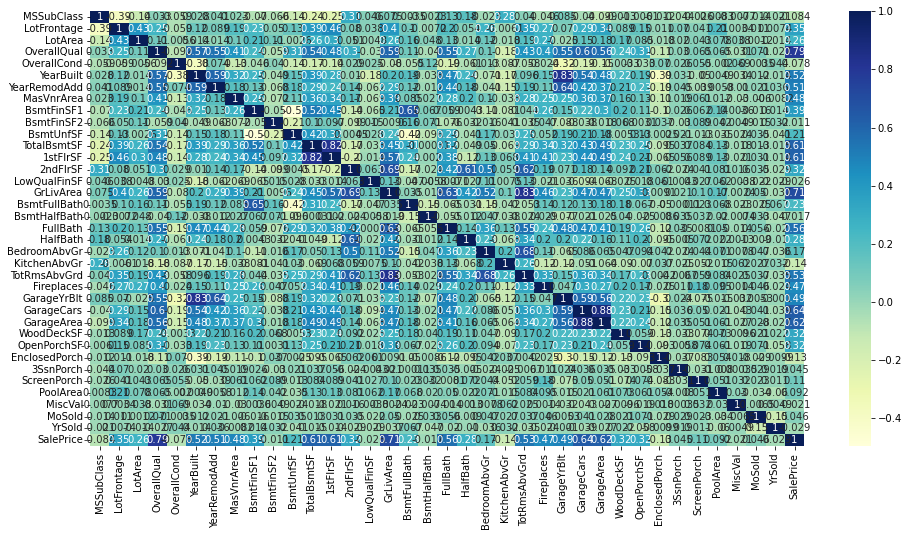

In [8]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_numeric_corr, cmap="YlGnBu", annot=True)
plt.show()

The heatmap above shows some useful insights:

Correlation of SalesPrice with independent variables:

SalesPrice is highly (positively) correlated with TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars and GarageArea

Correlation among independent variables:

Severall independent variable are highly correlated:

- GarageYrBlt,YearBuilt,YearRemodAdd
- GrLivArea and TotRmsAbvGrd
- BedroomAbvGr and TotRmsAbvGrd

We need to be aware of possible colinearity

#### Step 2 - Handling null values

From the 81 collumns, 18 have non-null values
- Alley (91 non null values)
- MasVnrType (1452 non null values)
- MasVnrArea (1452 non null values)
- BsmtQual (1423 non-null values) 
- BsmtCond (1423 non-null values)
- BsmtExposure (1422 non-null values) 
- BsmtFinType1 (1423 non-null values)
- BsmtFinType2 (1422 non-null values)
- Electrical (1495 non-null values)
- FireplaceQu (770 non-null values)
- GarageType (1379 non-null values)
- GarageYrBlt (1379 non-null  values)
- GarageFinish (1379 non-null  values)
- GarageQual (1379 non-null values)
- GarageCond (1379 non-null values)
- PoolQC (7 non-nul  values)
- Fence (281 non-null values)
- MiscFeature (54 non-null values)

In [9]:
#Alley feature
#Its dummy variable with 3 possible values, there is one possible value NA - No alley access
#Makes sense to replace 'Null' with 'NA'
df["Alley"] = df["Alley"].fillna('NA')

#LotFrontage feature
#Its numeric variable we could use the median (69) to replace null values
df["LotFrontage"] = df["LotFrontage"].fillna(69)

#MasVnrType feature
#Its dummy variable with 5 possible values, one of the possible values is None -> null will be converted to none
df["MasVnrType"] = df["MasVnrType"].fillna('None')

#MasVnrArea feature
#Its numeric variable we could use the median (0) to replace null values
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

#BsmtQual feature
#Its dummy variable with 6 possible values,  one of the possible values is NA (no basement) -> null will be converted to NA
df["BsmtQual"] = df["BsmtQual"].fillna('NA')

#BsmtCond feature
#Its dummy variable with 6 possible values,  one of the possible values is NA (no basement) -> null will be converted to NA
df["BsmtCond"] = df["BsmtCond"].fillna('NA')

#BsmtExposure feature
#Its dummy variable with 5 possible values,  one of the possible values is NA (no basement) -> null will be converted to NA
df["BsmtExposure"] = df["BsmtExposure"].fillna('NA')

#BsmtFinType1 feature
#Its dummy variable with 7 possible values,  one of the possible values is NA (no basement) -> null will be converted to NA
df["BsmtFinType1"] = df["BsmtFinType1"].fillna('NA')

#BsmtFinType2 feature
#Its dummy variable with 7 possible values,  one of the possible values is NA (no basement) -> null will be converted to NA
df["BsmtFinType2"] = df["BsmtFinType2"].fillna('NA')

#Electrical feature
#Its dummy variable with 5 possible values, null values will be converted to "Unknonw"
df["Electrical"] = df["Electrical"].fillna('Unknown')

#FireplaceQu feature
#Its dummy variable with 6 possible values,  one of the possible values is NA (no fireplace) -> null will be converted to NA
df["FireplaceQu"] = df["FireplaceQu"].fillna('NA')

#GarageType feature
#Its dummy variable with 7 possible values,  one of the possible values is NA (no garage) -> null will be converted to NA
df["GarageType"] = df["GarageType"].fillna('NA')

#GarageYrBlt feature
#Its numeric variable we can use the median (1980) to replace null values
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(1980)

#GarageFinish feature
#Its dummy variable with 4 possible values,  one of the possible values is NA (no garage) -> null will be converted to NA
df["GarageFinish"] = df["GarageFinish"].fillna('NA')

#GarageQual feature
#Its dummy variable with 6 possible values,  one of the possible values is NA (no garage) -> null will be converted to NA
df["GarageQual"] = df["GarageQual"].fillna('NA')

#GarageCond feature
#Its dummy variable with 6 possible values,  one of the possible values is NA (no garage) -> null will be converted to NA
df["GarageCond"] = df["GarageCond"].fillna('NA')

#PoolQC feature
#Its dummy variable with 5 possible values,  one of the possible values is NA (no pool) -> null will be converted to NA
df["PoolQC"] = df["PoolQC"].fillna('NA')

#Fence feature
#Its dummy variable with 5 possible values,  one of the possible values is NA (no fence) -> null will be converted to NA
df["Fence"] = df["Fence"].fillna('NA')

#MiscFeature feature
#Its dummy variable with 6 possible values,  one of the possible values is NA (none) -> null will be converted to NA
df["MiscFeature"] = df["MiscFeature"].fillna('NA')

In [10]:
#confimr nulls replacement
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [11]:
# one more check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

CHEKING assumptions

In [12]:
# all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])

df_numeric.drop(['MSSubClass', 'OverallQual','OverallCond'], axis=1, inplace=True)
df_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

<AxesSubplot:xlabel='LotFrontage'>

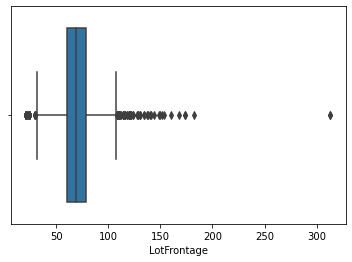

In [14]:
# lets see if we have outliers
sns.boxplot(df_numeric['LotFrontage'])

In [15]:
df_numeric['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage'>

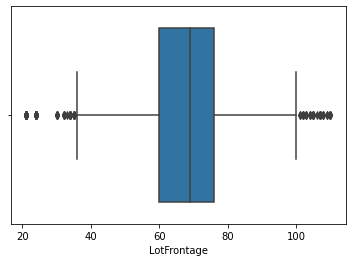

In [16]:
#replacing outliers for LotFrontage
df_numeric['LotFrontage'] = np.where(df_numeric['LotFrontage'] >110,69,df_numeric['LotFrontage'])
sns.boxplot(df_numeric['LotFrontage'])

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

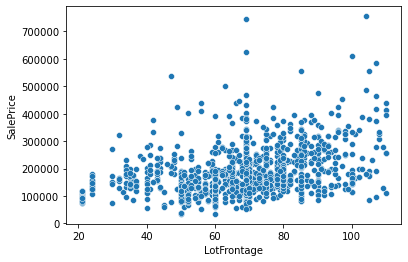

In [17]:
sns.scatterplot(data=df_numeric,x='LotFrontage',y='SalePrice')

<AxesSubplot:xlabel='GrLivArea'>

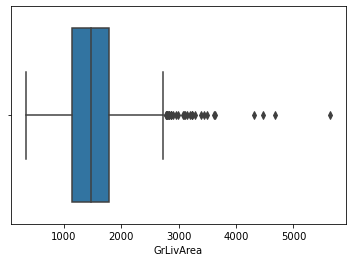

In [18]:
sns.boxplot(df_numeric['GrLivArea'])

In [19]:
df_numeric['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

<AxesSubplot:xlabel='GrLivArea'>

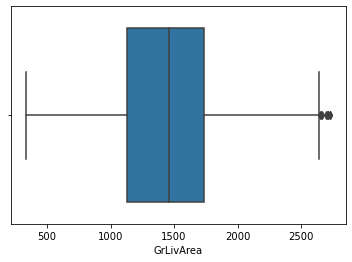

In [20]:
#replacing outliers for GrLivArea
df_numeric['GrLivArea'] = np.where(df_numeric['GrLivArea'] >2750,1464,df_numeric['GrLivArea'])
sns.boxplot(df_numeric['GrLivArea'])

In [21]:
X =  df_numeric.loc[ : , df_numeric.columns != 'SalePrice']
y = np.array(df_numeric['SalePrice']).reshape(-1,1)
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [22]:
y_pred=reg.predict(X)

In [23]:
r2_score(y,y_pred)

0.7812062072332785

In [24]:
print(reg.intercept_)

[-464598.90875778]


In [25]:
print(reg.coef_)

[[-1.71367386e+00  4.25371234e+02  2.69921658e-01  2.93711420e+02
   4.57867162e+02  3.55539904e+01  1.30251394e+01 -1.26495986e+00
   5.76517779e+00  1.75253573e+01  5.56653326e+01  5.92363999e+01
   2.04189308e+01 -3.33620194e+00  8.13049725e+03  1.84692669e+03
   6.17519803e+03 -2.26814546e+03 -1.37339267e+04 -3.94816317e+04
   6.54785605e+03  7.19411341e+03  9.87959804e+01  1.43109883e+04
  -3.14562006e+00  2.43400982e+01  4.98151934e+00  2.39936172e+01
   1.09813502e+01  6.14322622e+01 -4.00856769e+01 -1.41355280e-01
   3.69393566e+02 -5.91954441e+02]]


In [26]:
rss = np.sum(np.square(y-y_pred))
print(rss)

2014633844359.0015


In [27]:
mse = mean_squared_error(y,y_pred)
print(mse)

1379886194.7664394


In [28]:
rmse = mse**0.5
print(rmse)

37146.81944347914


The r2 score is not bad 78% but the error value is considerable, the residual analisys will give us more insights

### Residual Analisys

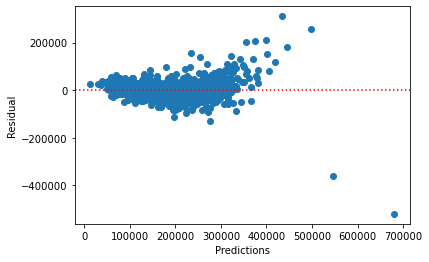

In [29]:
#residual analisys
y_res=y-y_pred

plt.scatter(y_pred,y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

There is a shape present, therefore non-linearity is present on the data

We need to plot each variable agains't the residual


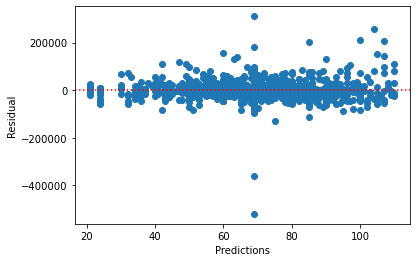

In [30]:
#For variable LotFrontage
plt.scatter(df_numeric['LotFrontage'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

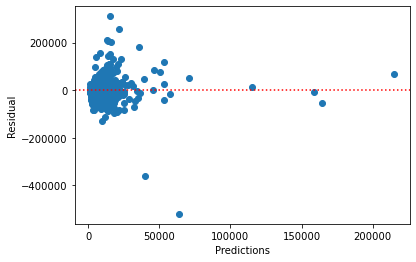

In [31]:
#For variable LotArea
plt.scatter(df_numeric['LotArea'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

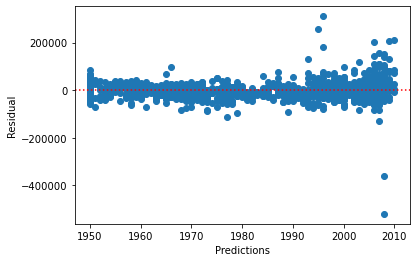

In [32]:
#For variable YearRemodAdd
plt.scatter(df_numeric['YearRemodAdd'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

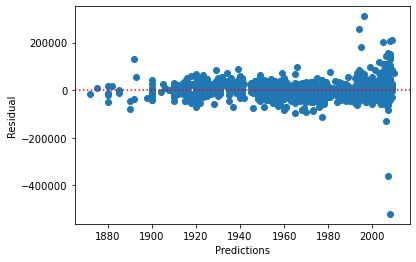

In [33]:
#For variable YearBuilt
plt.scatter(df_numeric['YearBuilt'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

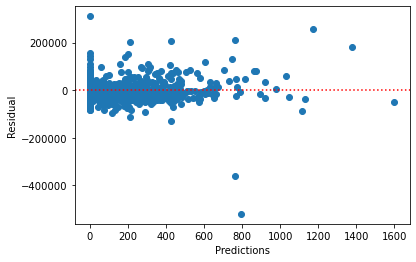

In [34]:
#For variable MasVnrArea
plt.scatter(df_numeric['MasVnrArea'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

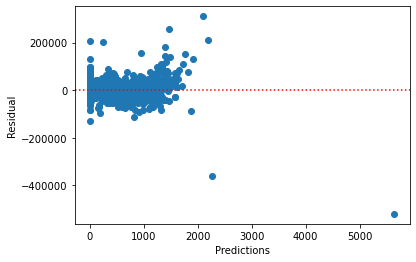

In [35]:
#For variable BsmtFinSF1
plt.scatter(df_numeric['BsmtFinSF1'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

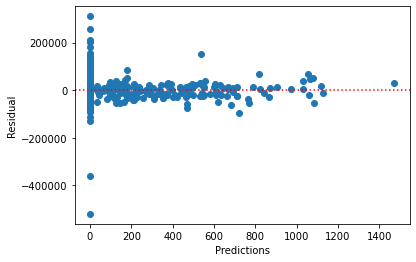

In [36]:
#For variable BsmtFinSF2
plt.scatter(df_numeric['BsmtFinSF2'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

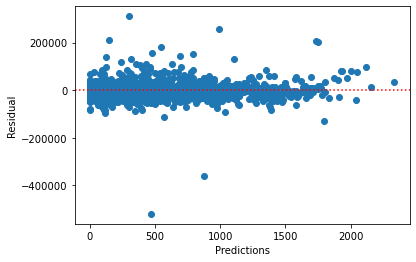

In [37]:
#For variable BsmtUnfSF
plt.scatter(df_numeric['BsmtUnfSF'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

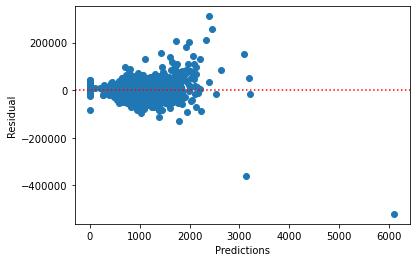

In [38]:
#For variable TotalBsmtSF
plt.scatter(df_numeric['TotalBsmtSF'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

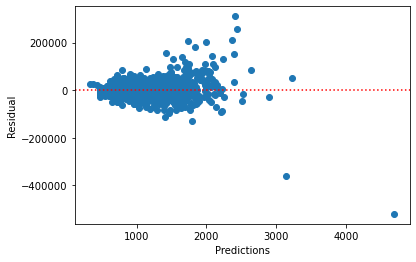

In [39]:
#For variable 1stFlrSF
plt.scatter(df_numeric['1stFlrSF'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

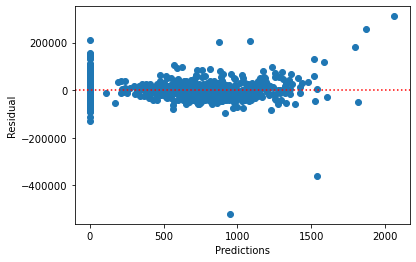

In [40]:
#For variable 2ndFlrSF
plt.scatter(df_numeric['2ndFlrSF'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

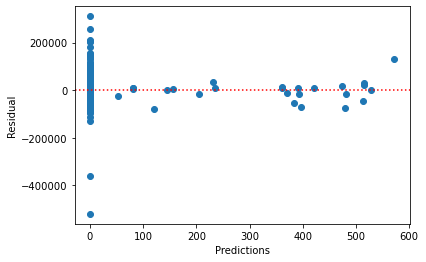

In [41]:
#For variable LowQualFinSF
plt.scatter(df_numeric['LowQualFinSF'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

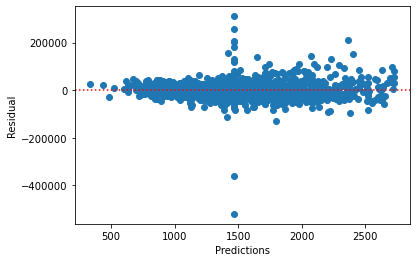

In [42]:
#For variable GrLivArea
plt.scatter(df_numeric['GrLivArea'],y_res)
plt.axhline(y=0,color='r',linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()


we can see that the residuals do not fulfill the conditions for linear regression, Lets see if we can make some changes so that the residuals are normally distributed.

Severall attemps of creatign derived collumns have been made for the variables that don't fullfil  the conditions. SQRT,LOG, EXP funcitons gave been used but none of them result in a better R2 score agains SalePrice. 

#### Step 3 - Handling binary variables

From the 81 collumns, the following have 2 possible values
 - Street - ('Grvl','Pave')
 - CentralAir - ('N','Y')

In [43]:
# transforming 'Grvl' and 'Pave' to 0 and 1 and 'N','Y' to 0 and 1
bynaryvarlist = ['Street','CentralAir']
def binary_map(x):
    return x.map({'Grvl':0 ,'Pave': 1,'N':0 ,'Y': 1})
df[bynaryvarlist]=df[bynaryvarlist].apply(binary_map)
df[bynaryvarlist].head()

,Street,CentralAir
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


#### Step 4 - Handling dummy variables

 - 1   MSSubClass
 - 2   MSZoning 
 - 6   Alley
 - 7   LotShape
 - 8   LandContour
 - 9   Utilities
 - 10  LotConfig
 - 11  LandSlope
 - 12  Neighborhood
 - 13  Condition1
 - 14  Condition2
 - 15  BldgType
 - 16  HouseStyle
 - 17  OverallQual
 - 18  OverallCond  
 - 21  RoofStyle
 - 22  RoofMatl
 - 23  Exterior1st
 - 24  Exterior2nd
 - 25  MasVnrType
 - 27  ExterQual
 - 28  ExterCond
 - 29  Foundation
 - 30  BsmtQual
 - 31  BsmtCond
 - 32  BsmtExposure
 - 33  BsmtFinType1
 - 35  BsmtFinType2
 - 39  Heating
 - 40  HeatingQC
 - 42  Electrical
 - 53  KitchenQual
 - 55  Functional
 - 57  FireplaceQu
 - 58  GarageType
 - 60  GarageFinish
 - 63  GarageQual
 - 64  GarageCond
 - 65  PavedDrive
 - 72  PoolQC
 - 73  Fence
 - 74  MiscFeature
 - 78  SaleType
 - 79  SaleCondition

Before working on the dummy var list 3 of the categorical variables are numeric:

 - 1   MSSubClass
 - 17  OverallQual
 - 18  OverallCond  
 

We need to do some rework to apply the get_dummies correctly

In [44]:
df['MSSubClass']= df['MSSubClass'].astype(str);
df['OverallQual']= df['OverallQual'].astype(str);
df['OverallCond']= df['OverallCond'].astype(str);

In [45]:
dummyvarlist =  ['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','FireplaceQu','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
dummyvar =  pd.get_dummies(df[dummyvarlist ],drop_first=True)
df = pd.concat([df,dummyvar],axis=1)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 334 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(34), object(44), uint8(253)
memory usage: 1.3+ MB


In [47]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,65.0,8450,1,NA,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,80.0,9600,1,NA,Reg,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,68.0,11250,1,NA,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,60.0,9550,1,NA,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,84.0,14260,1,NA,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,0,1,0


#### Step 5 - Checking for correlations on the dummy variables

In [48]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#checking the correlation
correlationmatrix = df.corr()
correlationmatrix

,Id,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,-0.009921,-0.033226,0.008916,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,...,-0.058765,-0.020738,-0.018998,0.038920,0.026133,-0.034852,-0.009018,0.004865,0.015881,-0.020738
LotFrontage,-0.009921,1.000000,0.304522,-0.037349,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,...,0.012609,-0.051283,0.128995,-0.023074,-0.091864,-0.036570,-0.018040,0.016250,-0.074146,0.127293
LotArea,-0.033226,0.304522,1.000000,-0.197131,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
Street,0.008916,-0.037349,-0.197131,1.000000,0.021137,0.065465,0.017108,-0.015643,-0.038487,0.035229,...,0.003766,0.003766,0.019397,0.002915,0.006539,0.003367,-0.112734,0.007571,-0.002140,0.019657
YearBuilt,-0.012713,0.116685,0.014228,0.021137,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.002975,-0.023431,0.346954,0.012122,-0.238463,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,-0.036570,-0.013208,0.003367,-0.045601,-0.040294,-0.011783,-0.014874,-0.015130,-0.034618,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,-0.018040,0.008966,-0.112734,-0.010104,-0.020727,-0.013748,0.021369,-0.026277,-0.059130,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.016250,-0.010781,0.007571,-0.035785,-0.048056,-0.009535,0.000765,-0.007929,0.021534,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,-0.074146,0.005711,-0.002140,-0.158427,-0.120577,-0.081539,-0.019560,0.041207,-0.153930,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


We have a matrix of 290 x 290, the heatmap is unreadeable
Let's get a subset of the correlation matrix for each dummy variable

<AxesSubplot:>

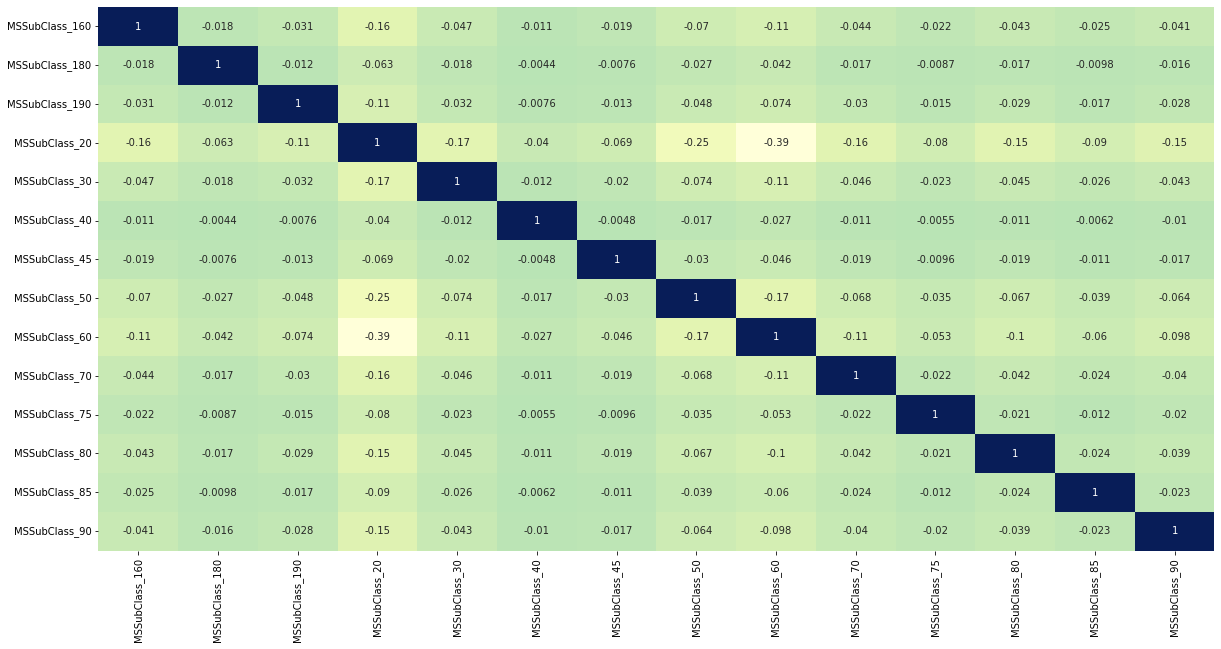

In [49]:
#MSSubClass

valuetosearch='MSSubClass'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10)) 
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)

There is no significat correlation

<AxesSubplot:>

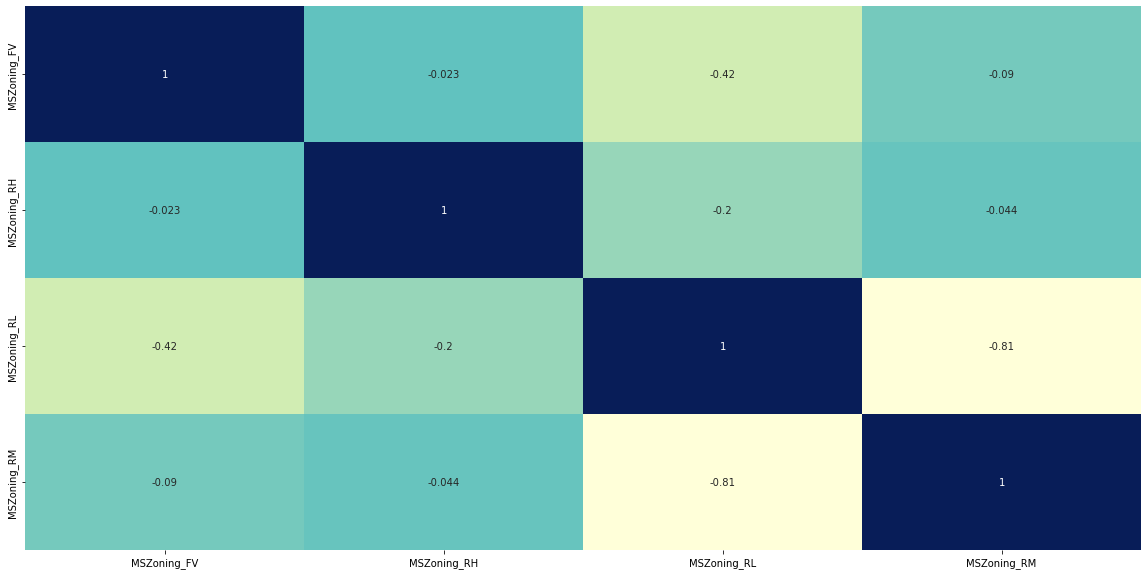

In [50]:
#MSZoning

valuetosearch='MSZoning'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10)) 
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)


There is a significat correlation between "MSZoning_RL" and "MSZoning_RM",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

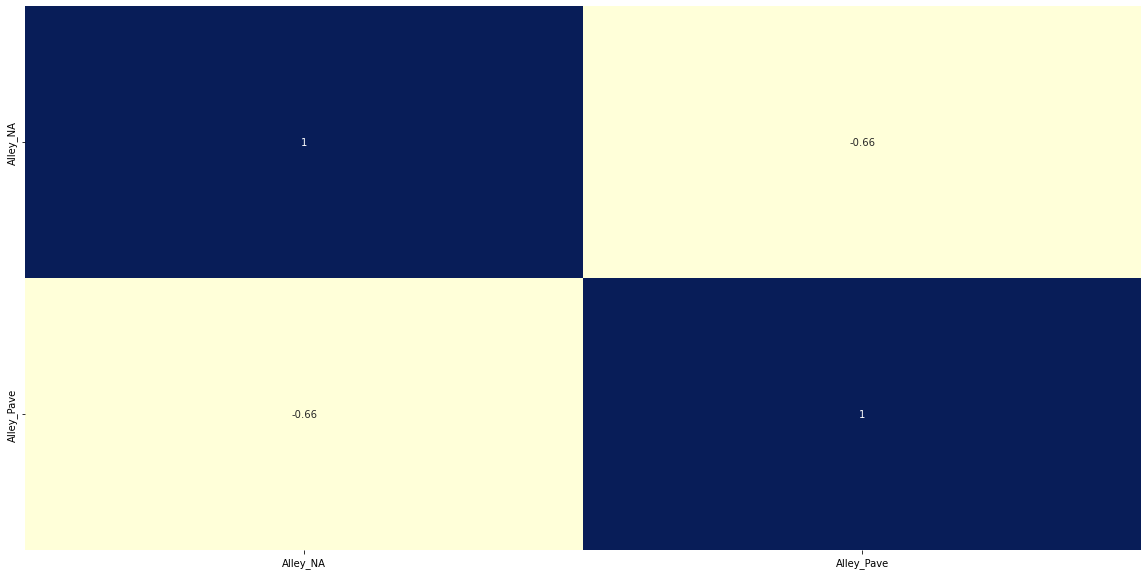

In [51]:
#Alley

valuetosearch='Alley'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10)) 
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)

There is a significat correlation between "Alley_NA" and "Alley_Pave",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

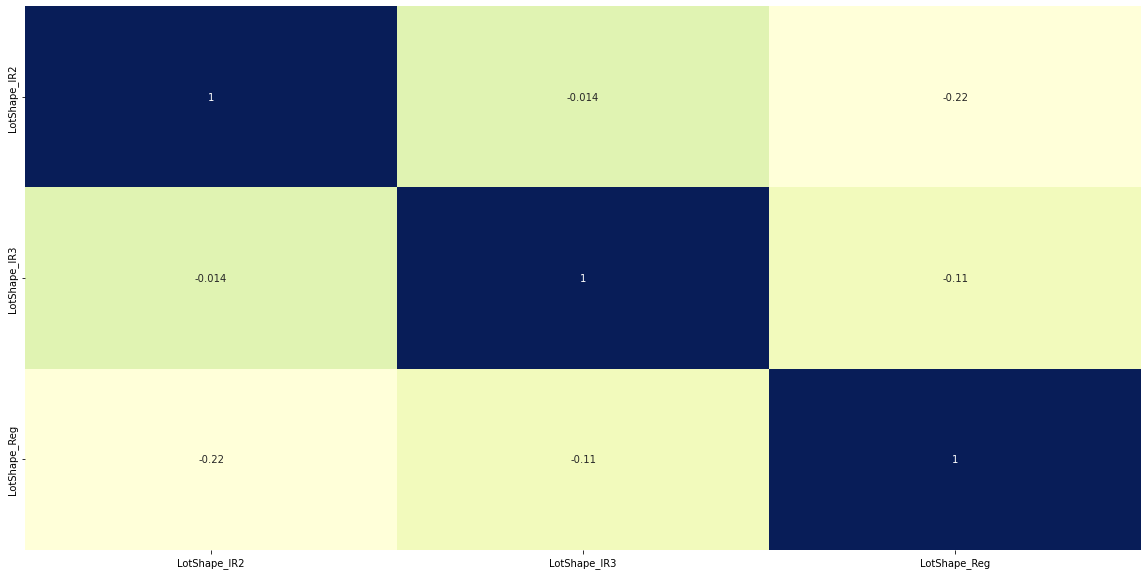

In [52]:
#LotShape

valuetosearch='LotShape'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10)) 
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)

There is no significat correlation

<AxesSubplot:>

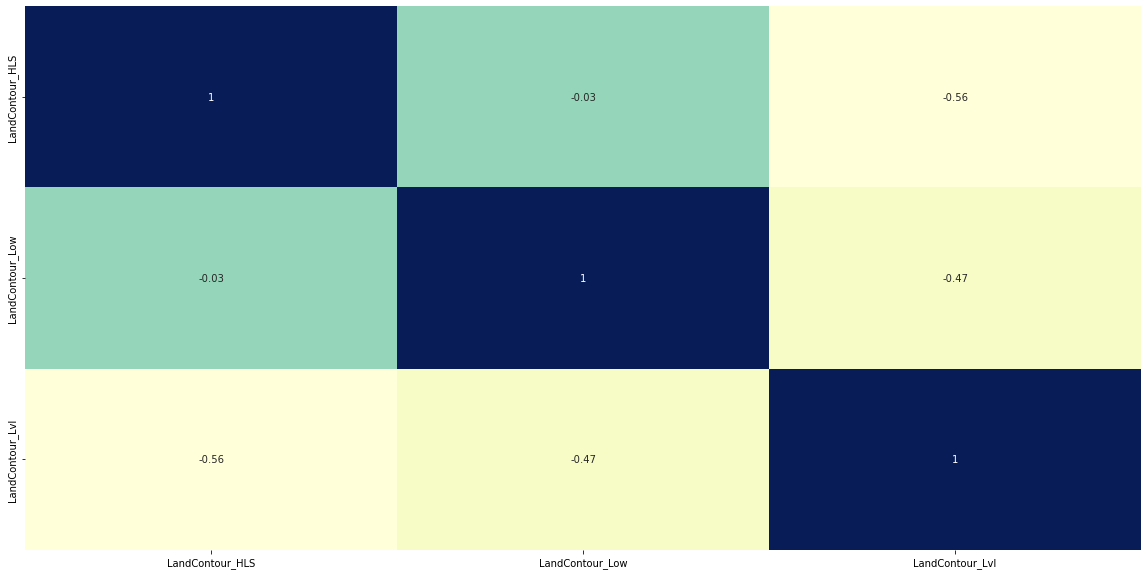

In [53]:
#LandContour

valuetosearch='LandContour'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10)) 
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)

There is no significat correlation

<AxesSubplot:>

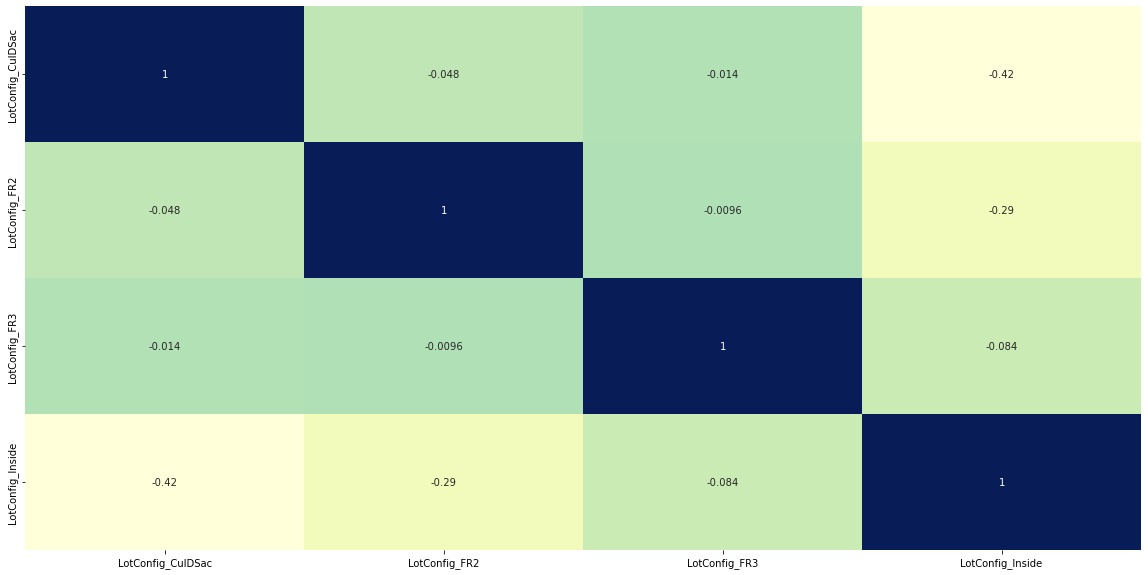

In [54]:
#LotConfig

valuetosearch='LotConfig'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
plt.figure(figsize = (20,10)) 
pd_new.columns = filtered_list
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)

There is no significat correlation

<AxesSubplot:>

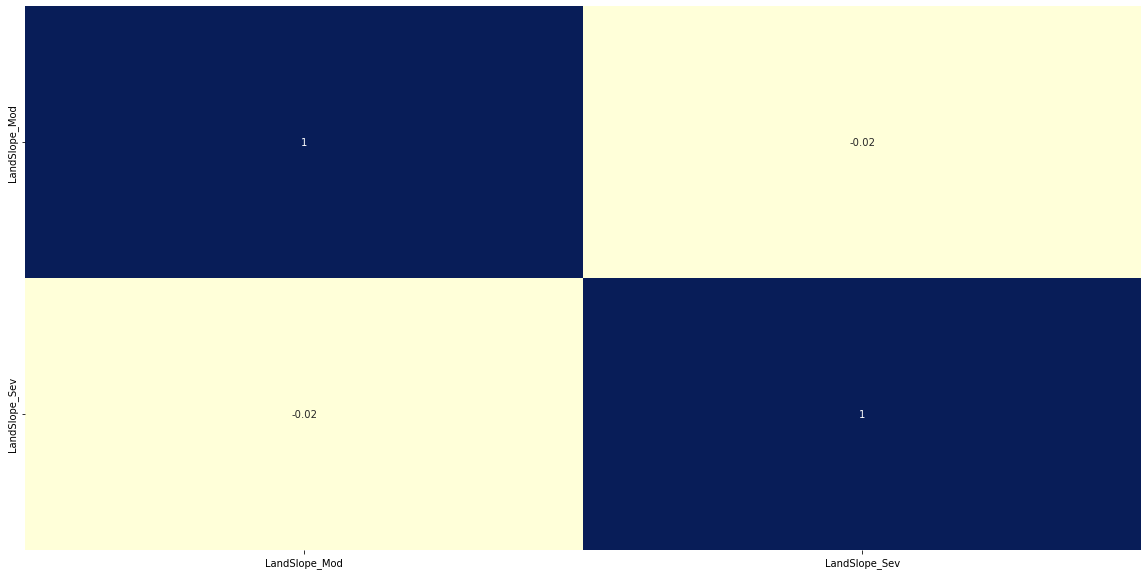

In [55]:
#LandSlope

valuetosearch='LandSlope'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10)) 
sns.heatmap(pd_new, annot=True, cmap="YlGnBu", cbar=False)

There is no significat correlation

<AxesSubplot:>

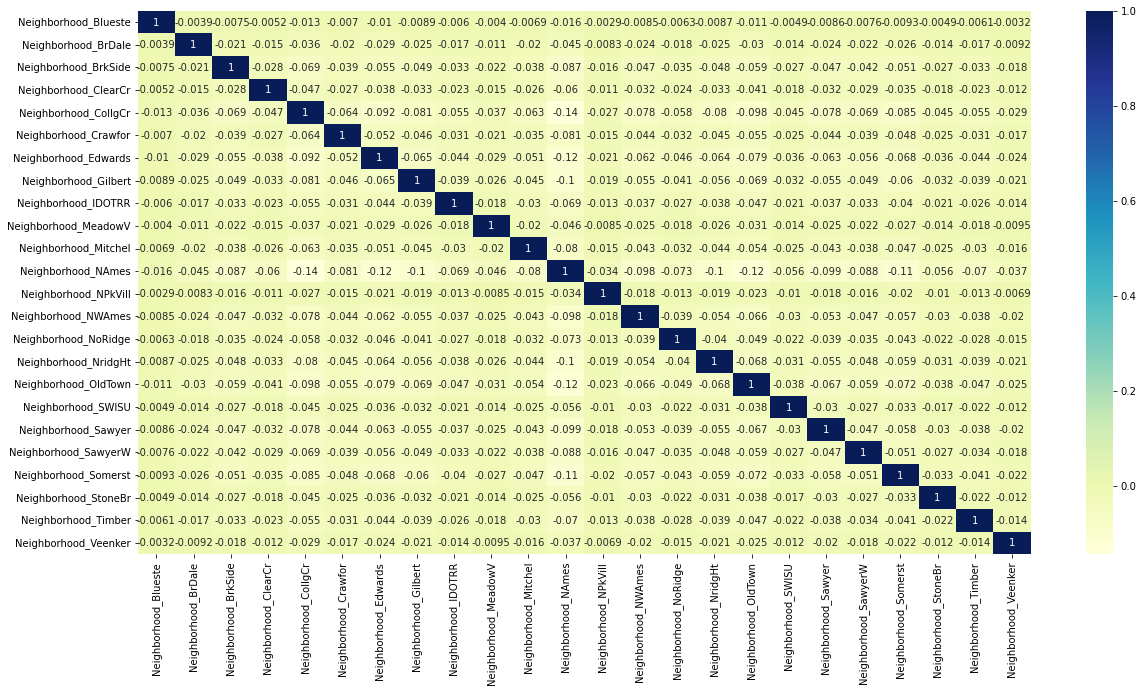

In [56]:
#Neighborhood

valuetosearch='Neighborhood'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

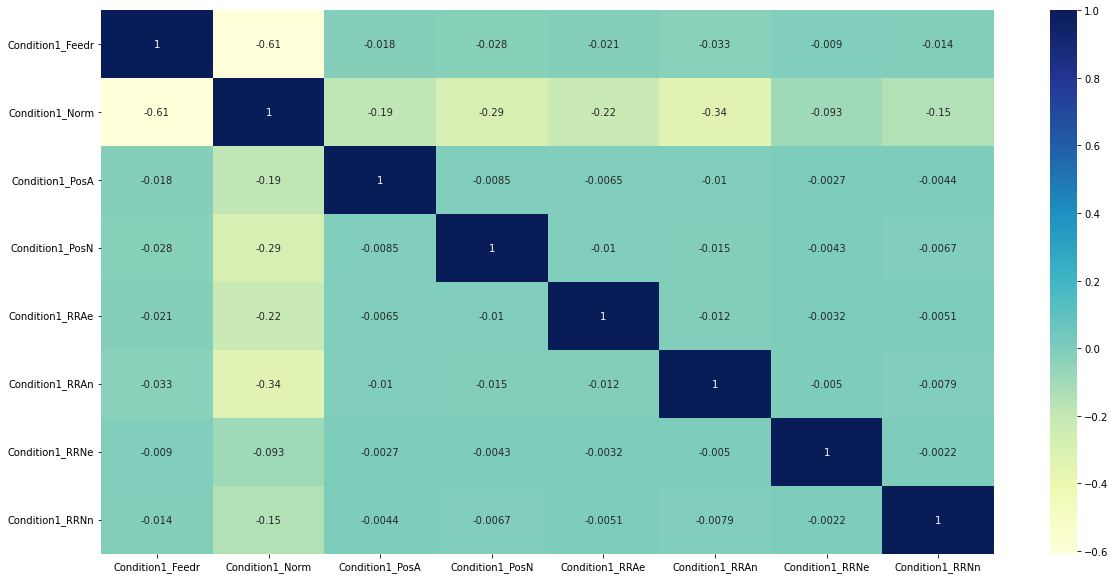

In [57]:
#Condition1

valuetosearch='Condition1'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "Condition1_Norm" and "Condition1_Feedr",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

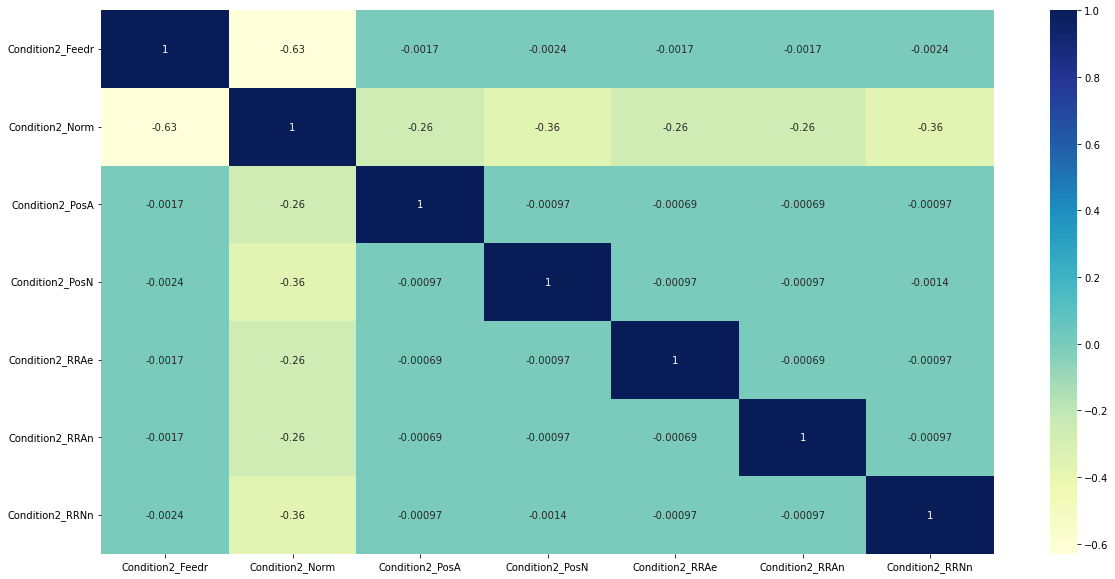

In [58]:
#Condition2

valuetosearch='Condition2'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "Condition2_Norm" and "Condition2_Feedr",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

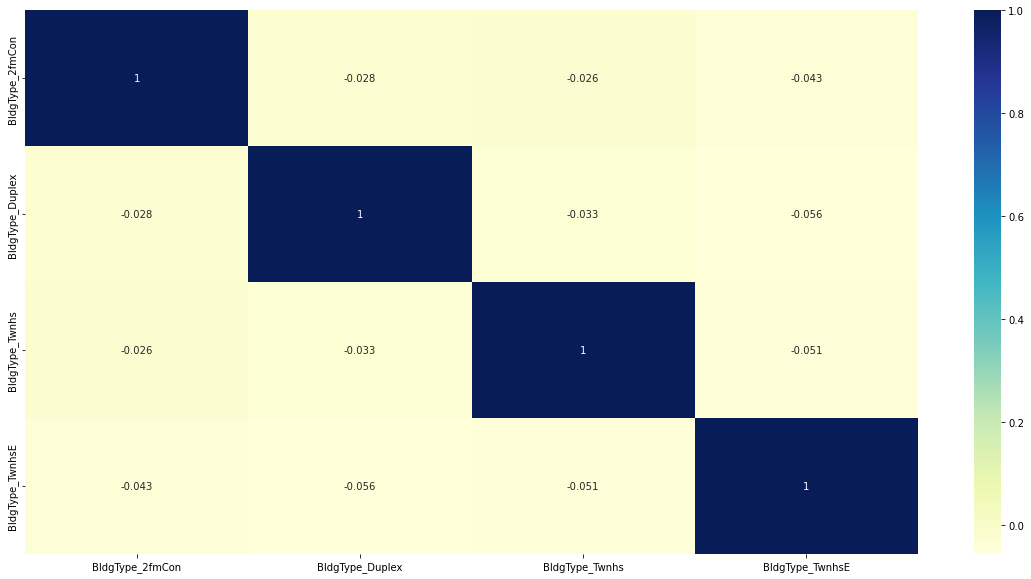

In [59]:
#BldgType

valuetosearch='BldgType'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

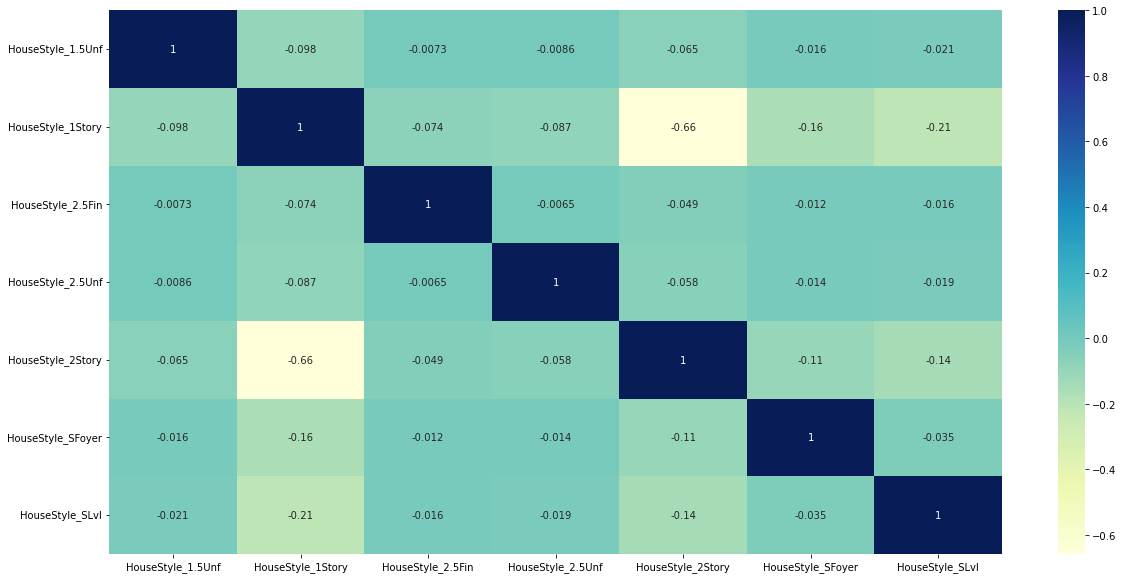

In [60]:
#HouseStyle

valuetosearch='HouseStyle'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "HouseStyle_2Story" and "HouseStyle_1Story",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

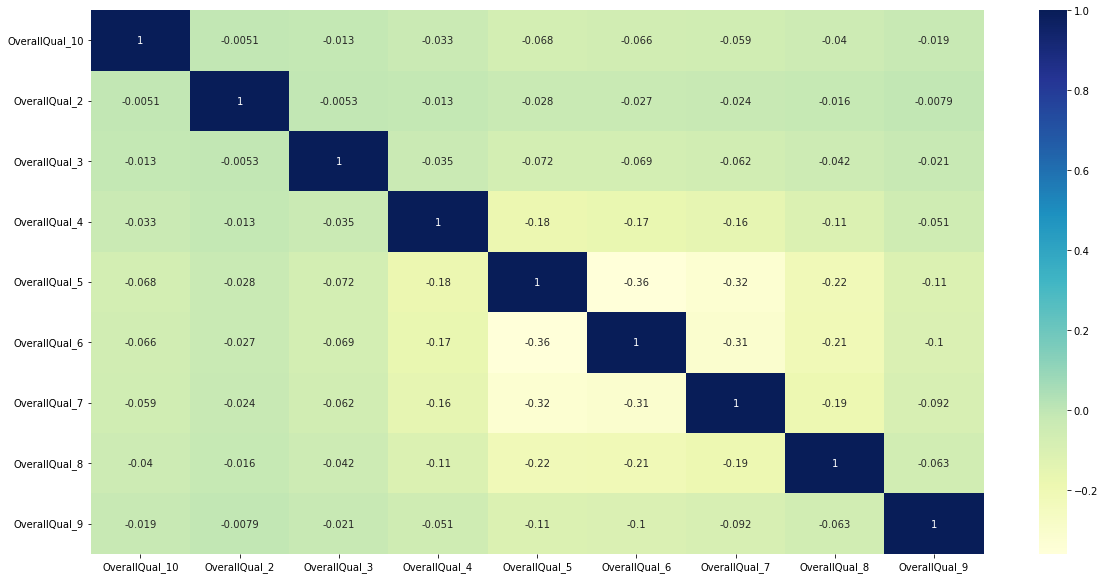

In [61]:
#OverallQual

valuetosearch='OverallQual'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

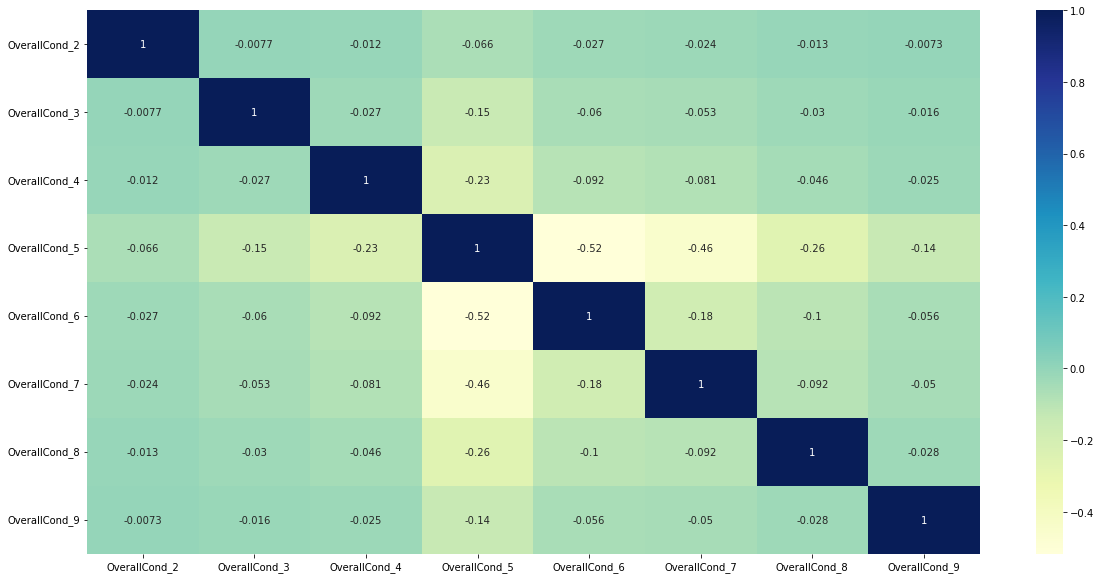

In [62]:
#OverallCond

valuetosearch='OverallCond'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

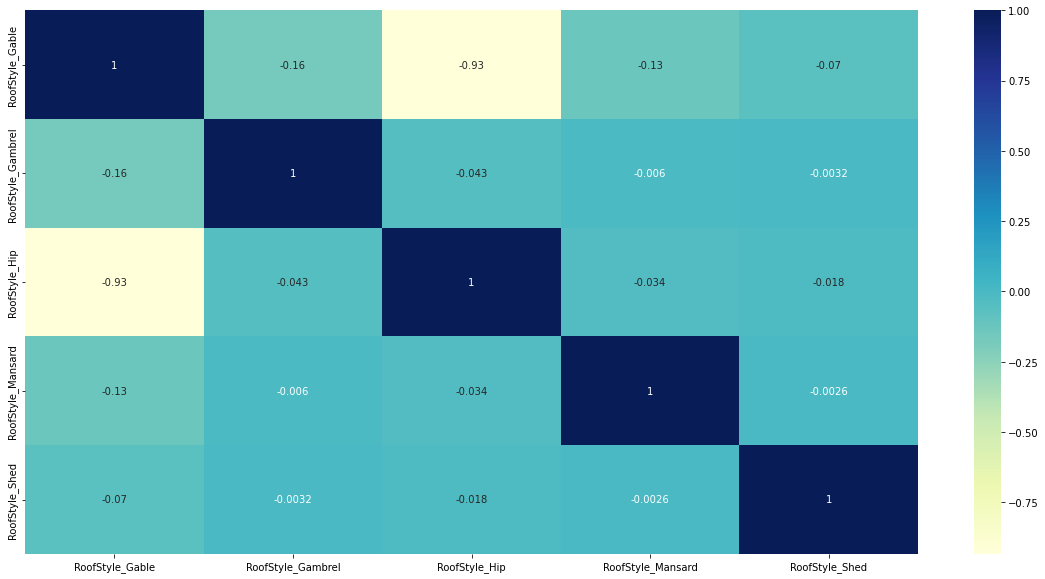

In [63]:
#RoofStyle

valuetosearch='RoofStyle'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "RoofStyle_Hip" and "RoofStyle_Gable",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

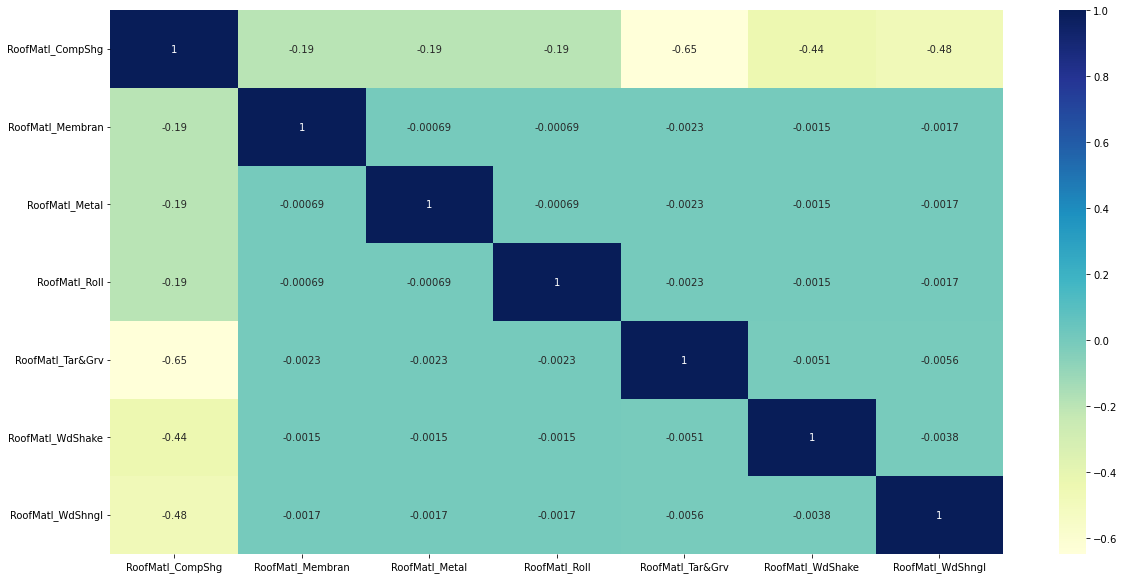

In [64]:
#RoofMatl

valuetosearch='RoofMatl'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "RoofMatl_Tar&Grv" and "RoofMatl_CompShg",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

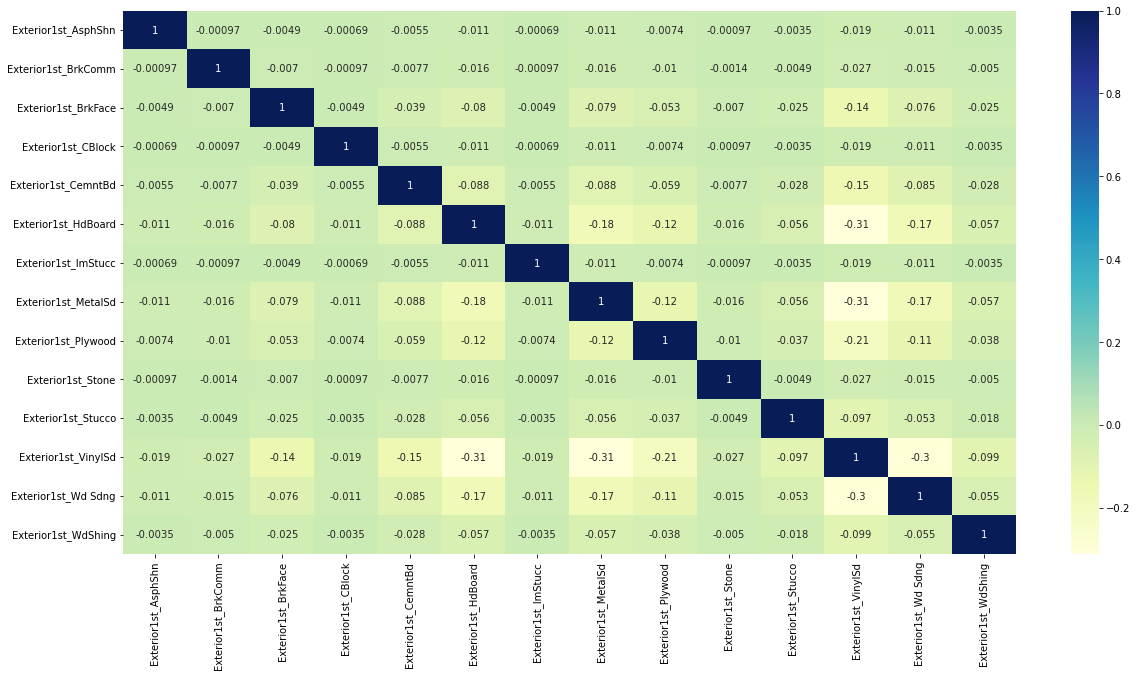

In [65]:
#Exterior1st

valuetosearch='Exterior1st'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

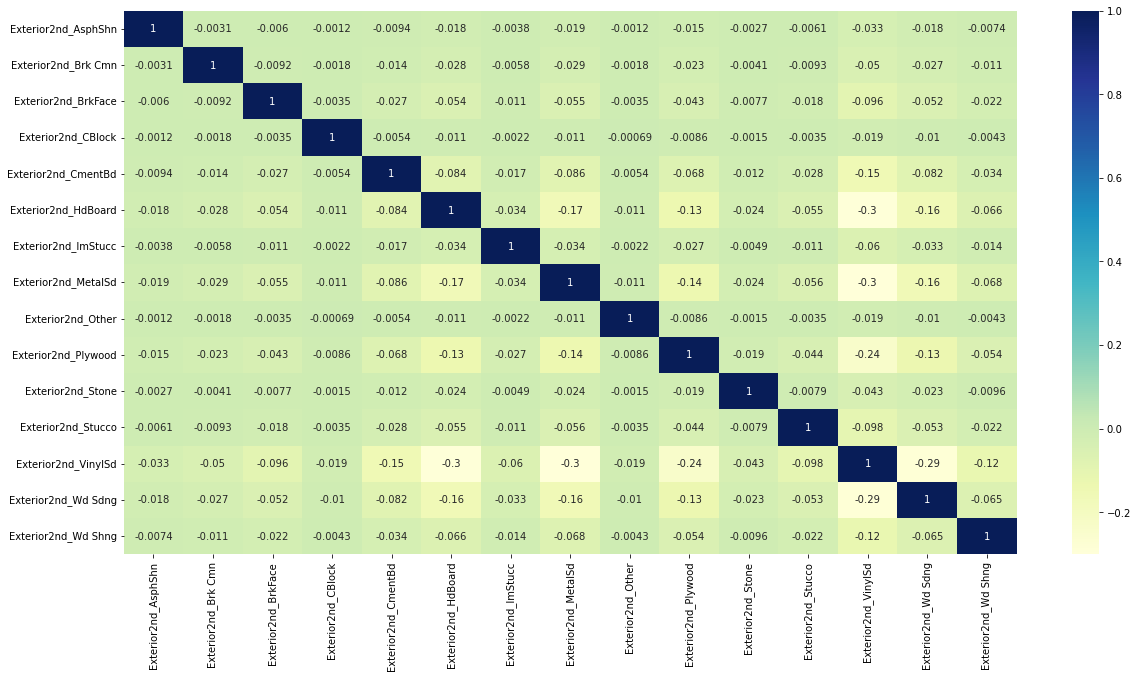

In [66]:
#Exterior2nd

valuetosearch='Exterior2nd'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
#sns.set(font_scale=0.7)   # set the font scale at 0.7
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")


There is no significat correlation

<AxesSubplot:>

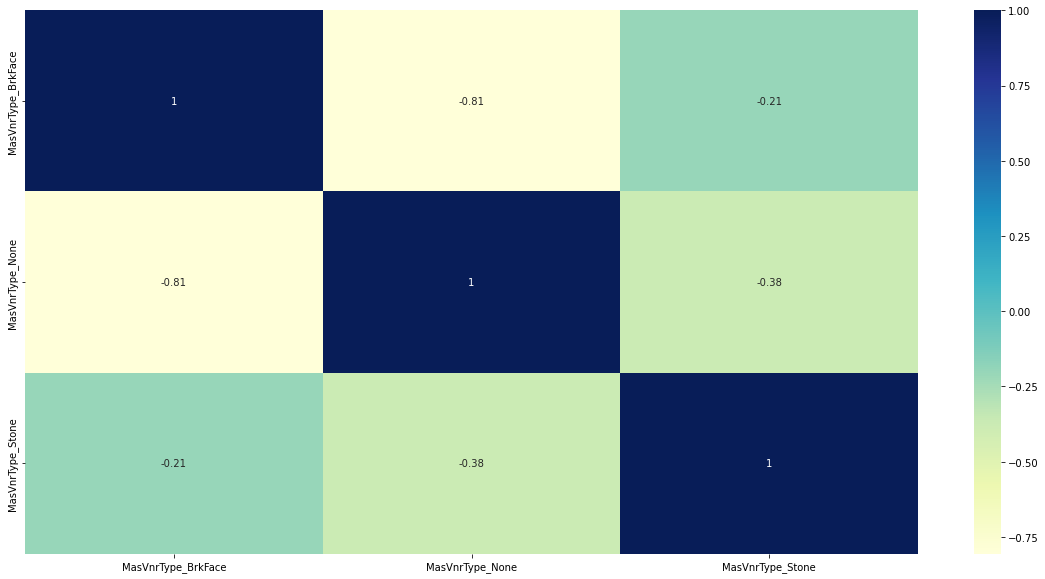

In [67]:
#MasVnrType

valuetosearch='MasVnrType'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "MasVnrType_None" and "MasVnrType_BrkFace",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

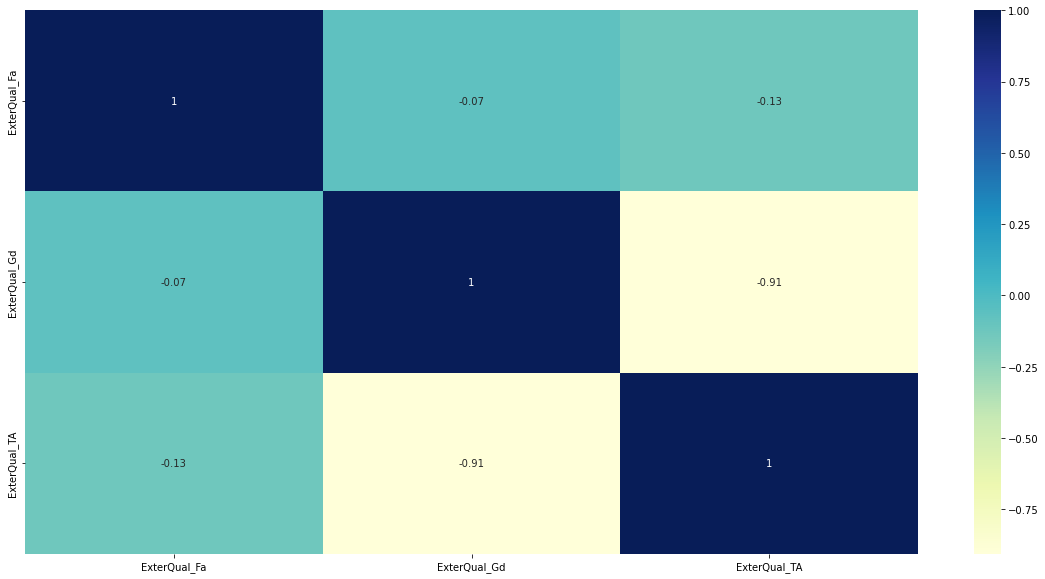

In [68]:
#ExterQual

valuetosearch='ExterQual'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "ExterQual_Gd" and "ExterQual_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

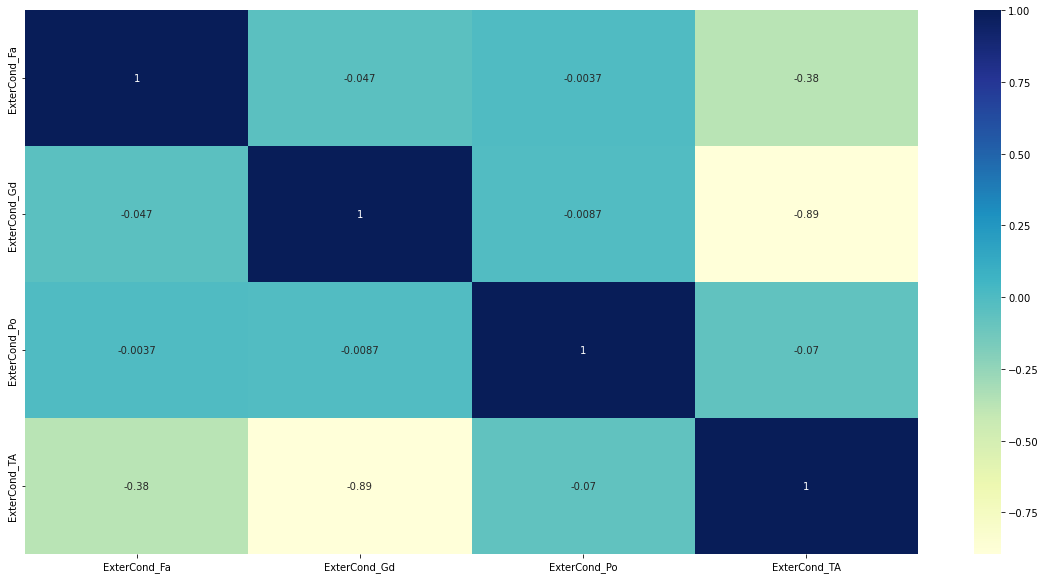

In [69]:
#ExterCond

valuetosearch='ExterCond'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "ExterCond_Gd" and "ExterCond_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

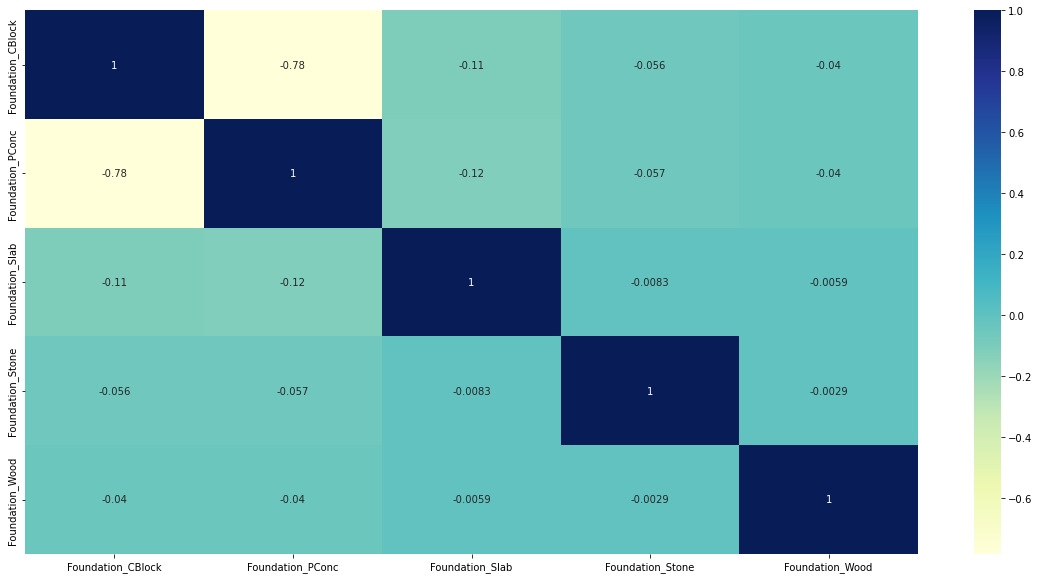

In [70]:
#Foundation

valuetosearch='Foundation'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "Foundation_CBlock" and "Foundation_PConc",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

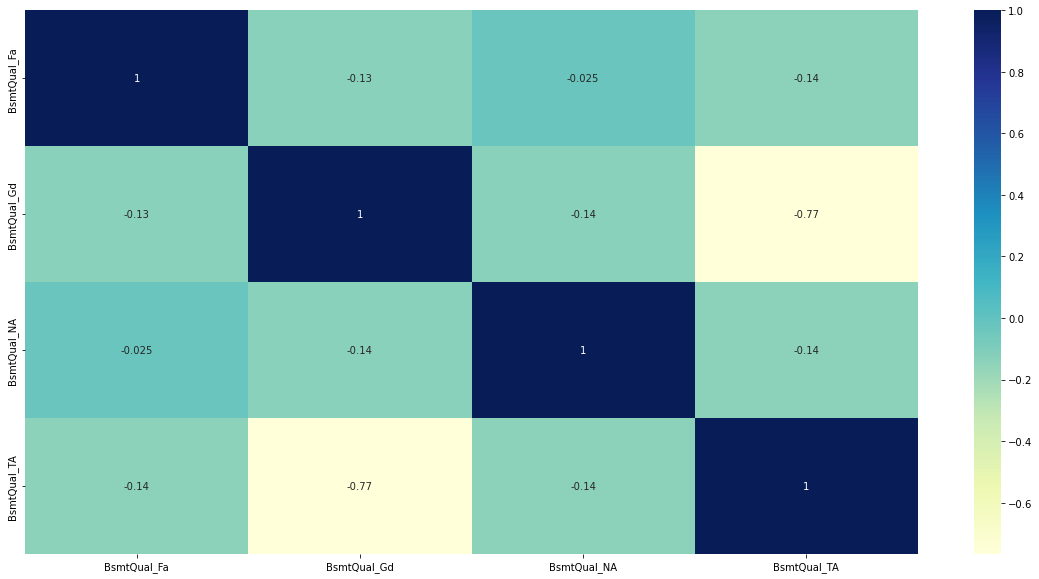

In [71]:
#BsmtQual

valuetosearch='BsmtQual'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "BsmtQual_Gd" and "BsmtQual_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

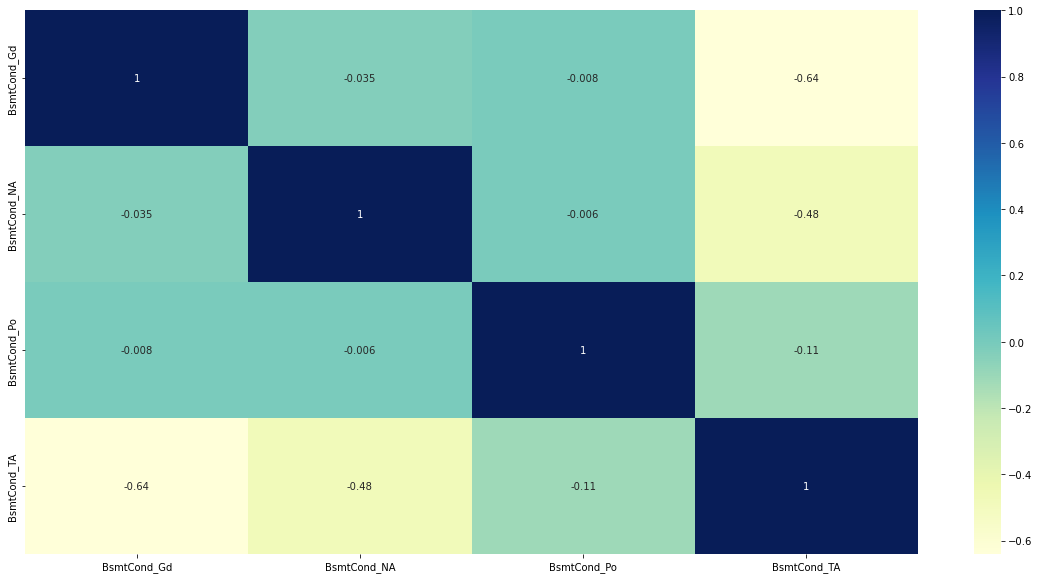

In [72]:

#BsmtCond

valuetosearch='BsmtCond'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "BsmtCond_Gd" and "BsmtCond_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

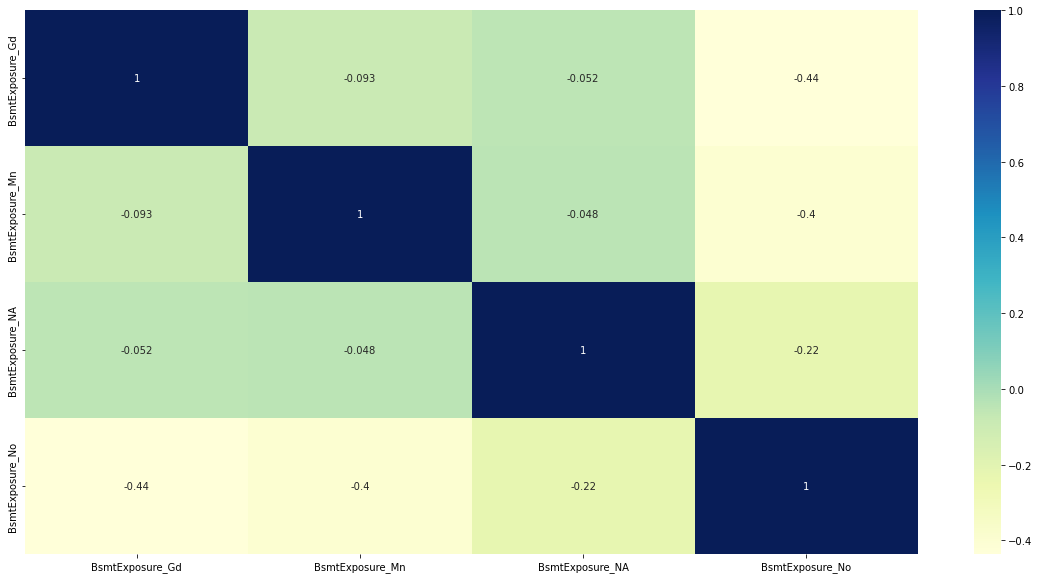

In [73]:
#BsmtExposure

valuetosearch='BsmtExposure'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

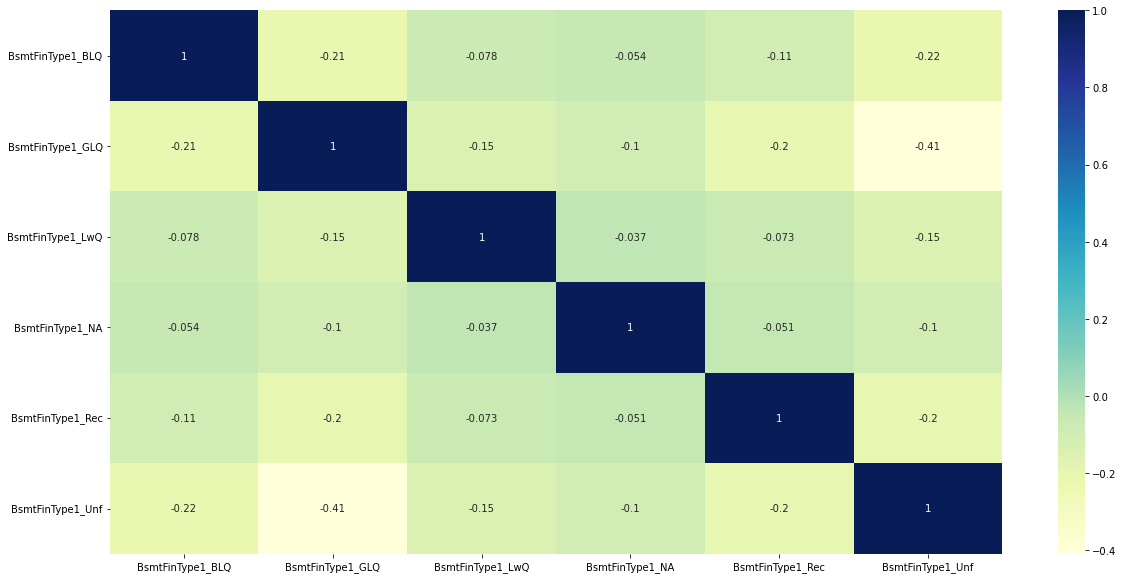

In [74]:
#BsmtFinType1

valuetosearch='BsmtFinType1'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

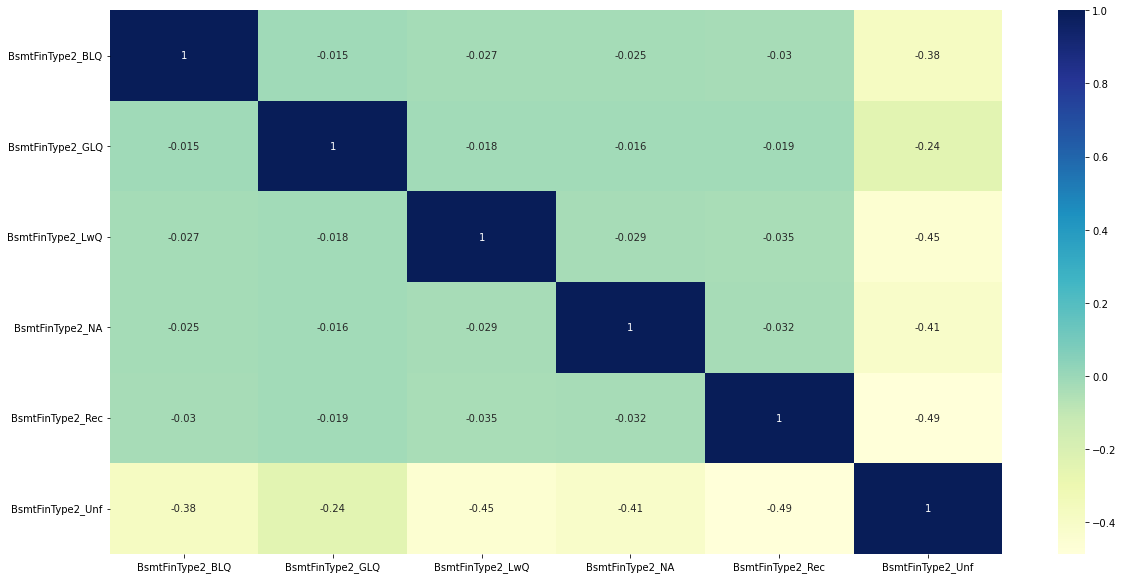

In [75]:
#BsmtFinType2

valuetosearch='BsmtFinType2'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

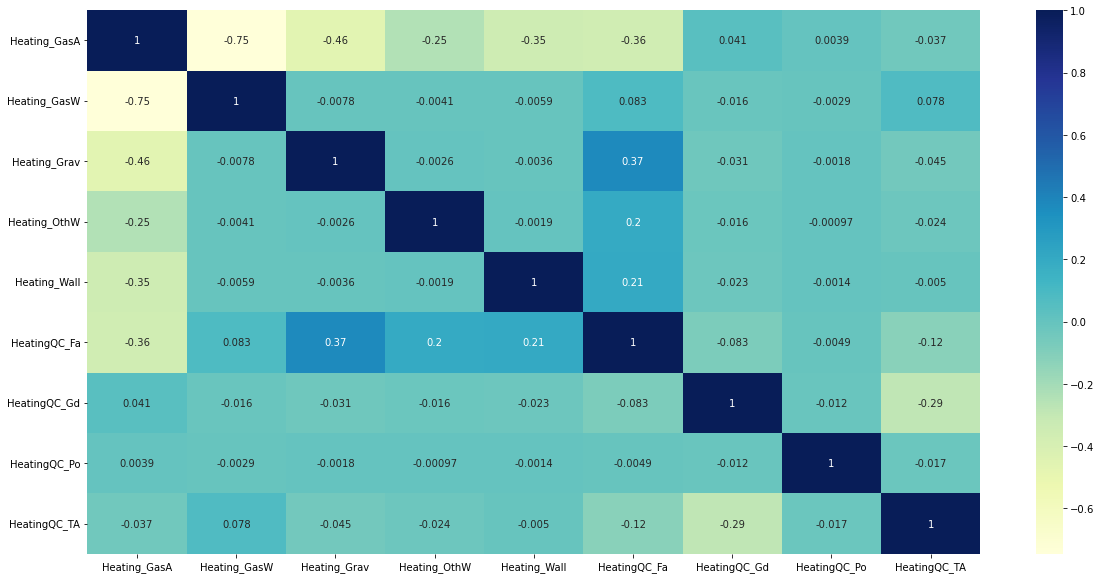

In [76]:
#Heating

valuetosearch='Heating'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

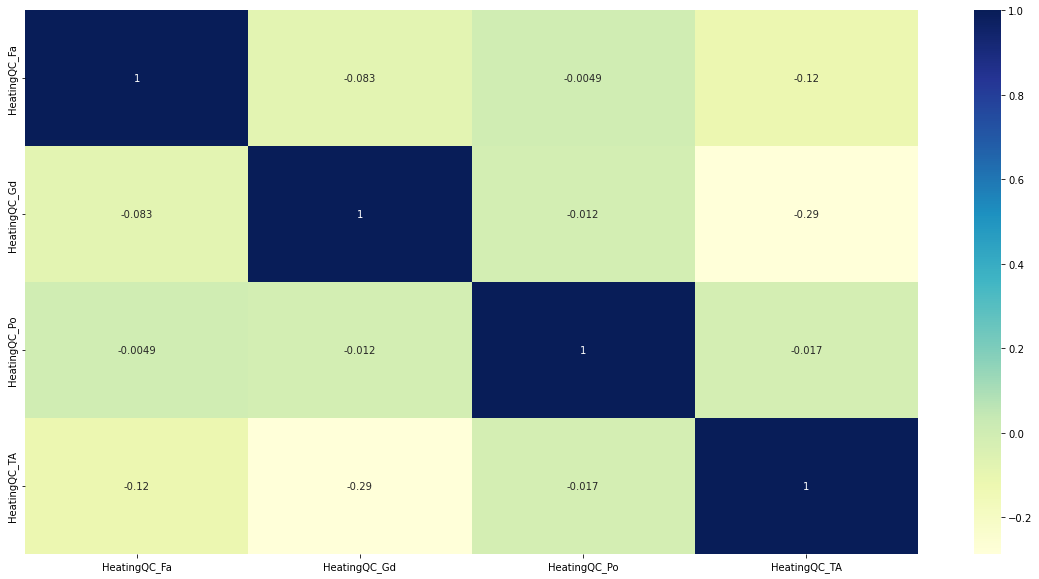

In [77]:
#HeatingQC

valuetosearch='HeatingQC'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

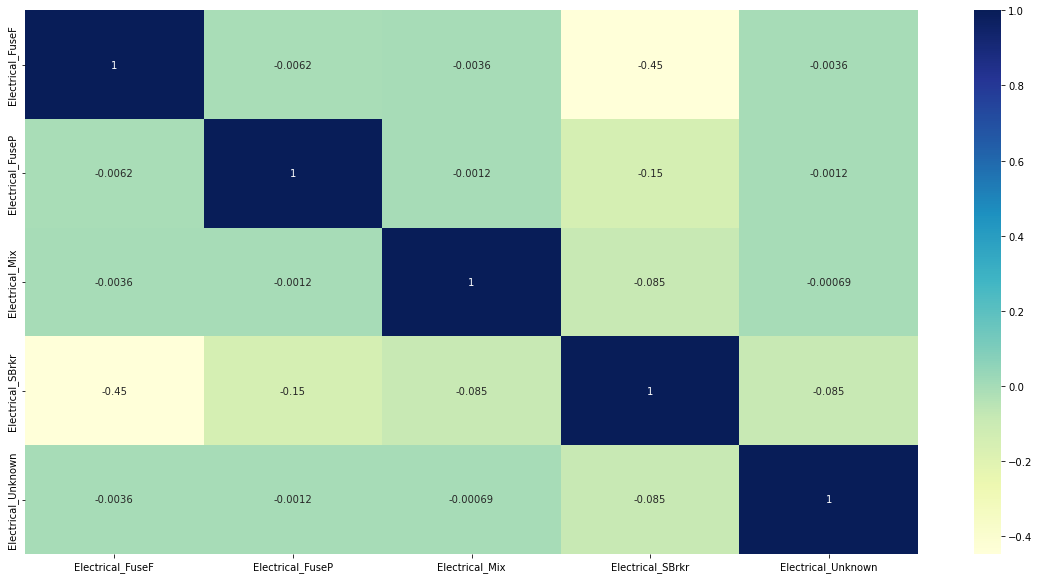

In [78]:
#Electrical

valuetosearch='Electrical'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

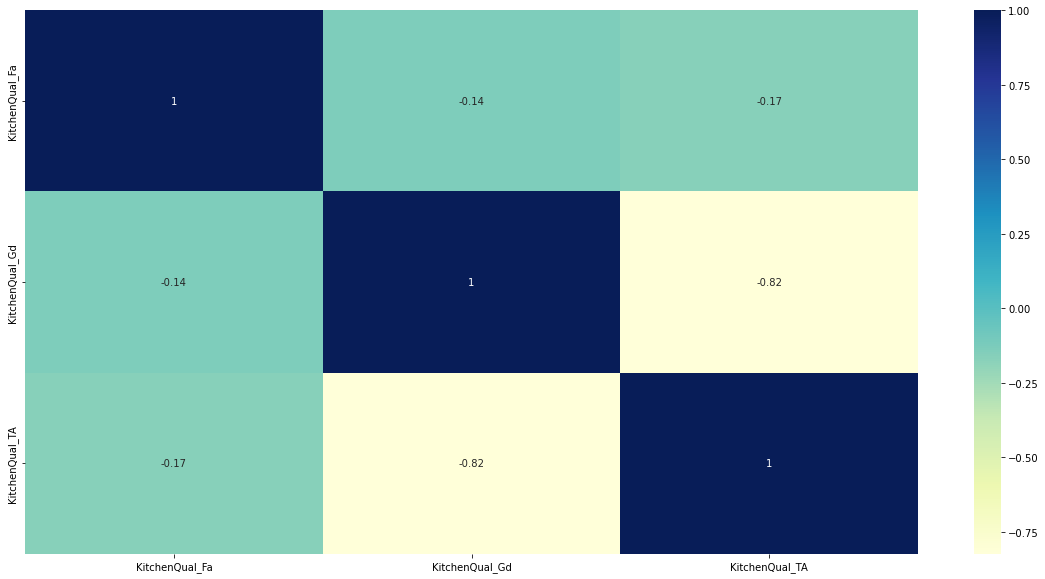

In [79]:
#KitchenQual

valuetosearch='KitchenQual'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "KitchenQual_Gd" and "KitchenQual_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

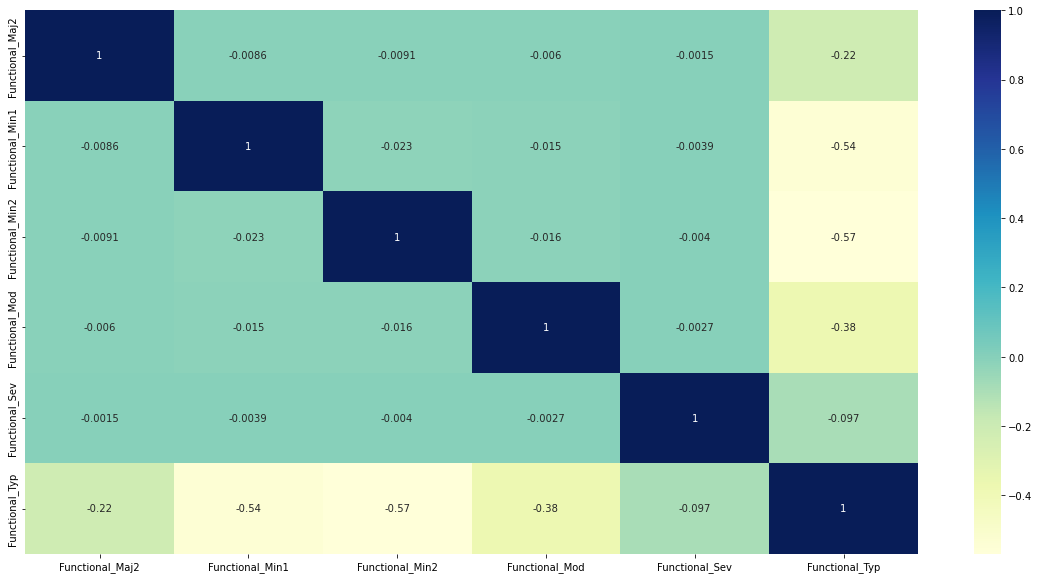

In [80]:
#Functional

valuetosearch='Functional'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

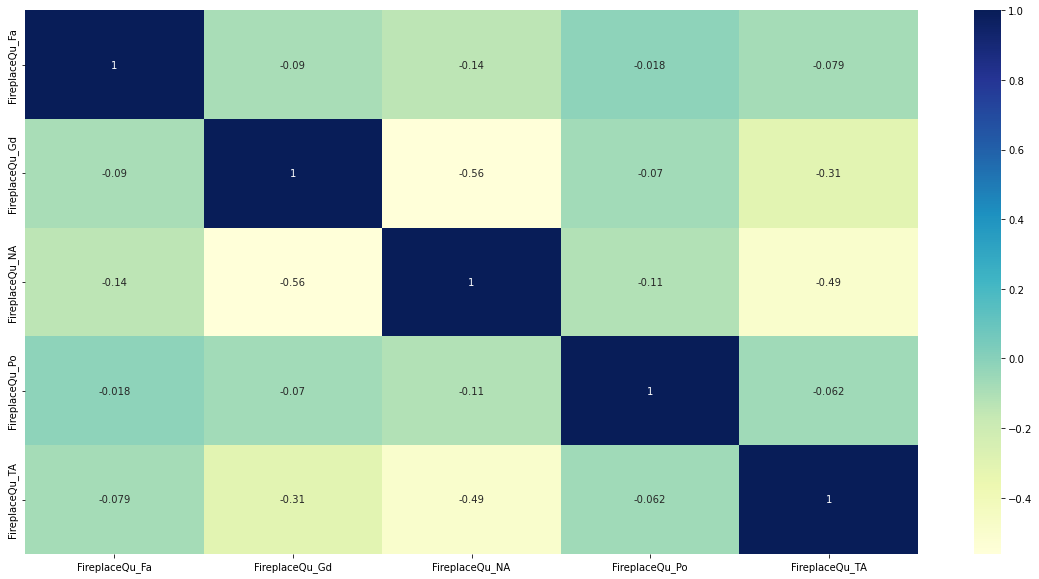

In [81]:
#FireplaceQu

valuetosearch='FireplaceQu'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

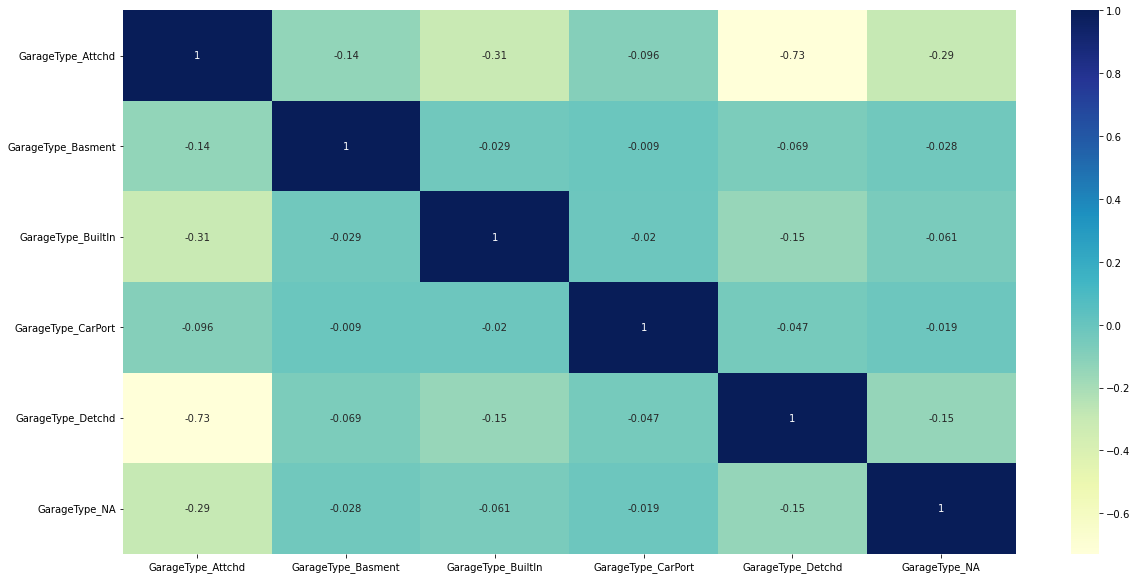

In [82]:
#GarageType

valuetosearch='GarageType'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "GarageType_Detchd" and "GarageType_Attchd",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

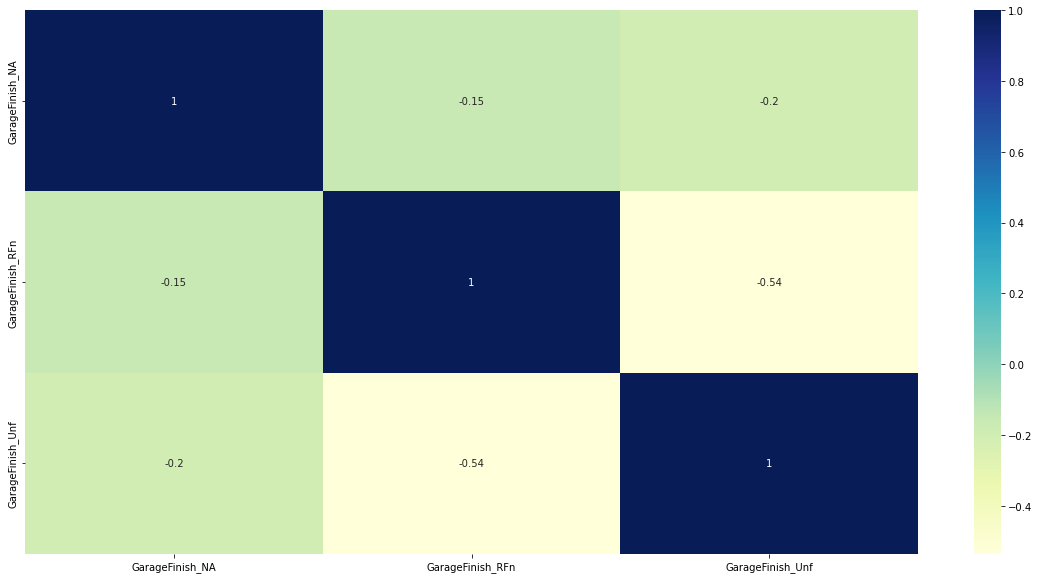

In [83]:
#GarageFinish

valuetosearch='GarageFinish'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

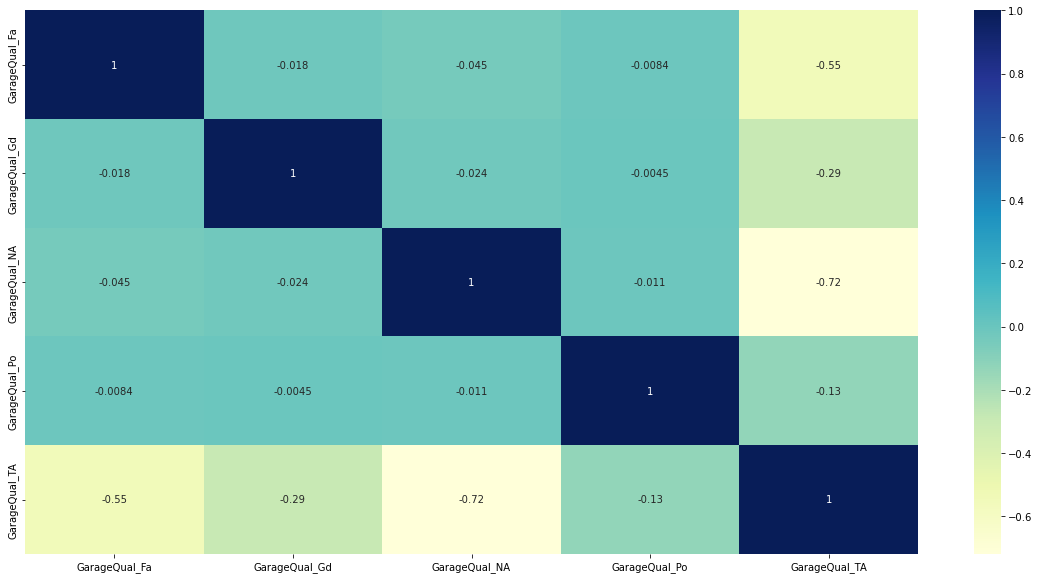

In [84]:
#GarageQual

valuetosearch='GarageQual'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "GarageQual_NA" and "GarageQual_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

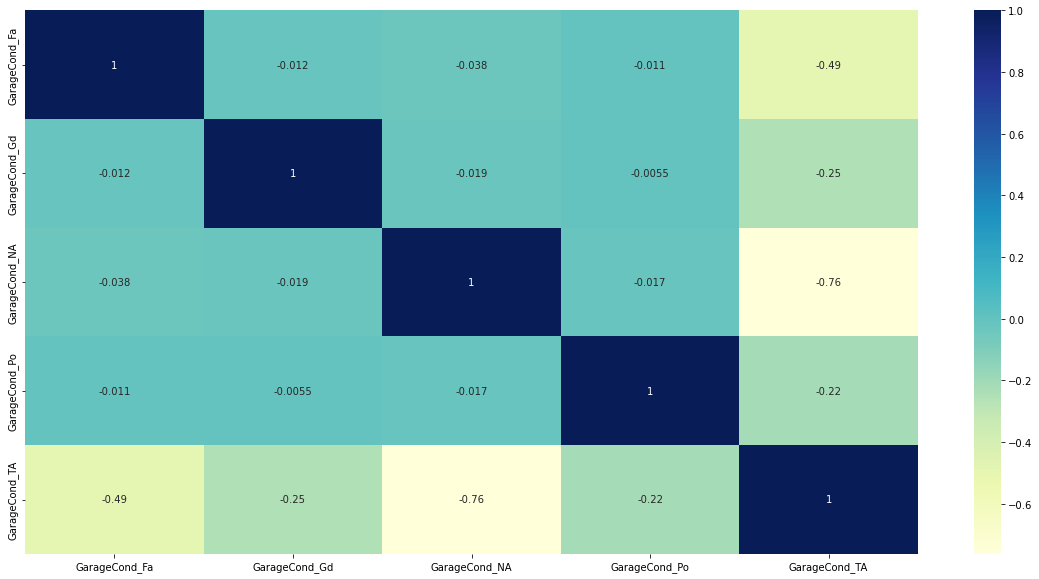

In [85]:
#GarageCond

valuetosearch='GarageCond'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "GarageCond_NA" and "GarageCond_TA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

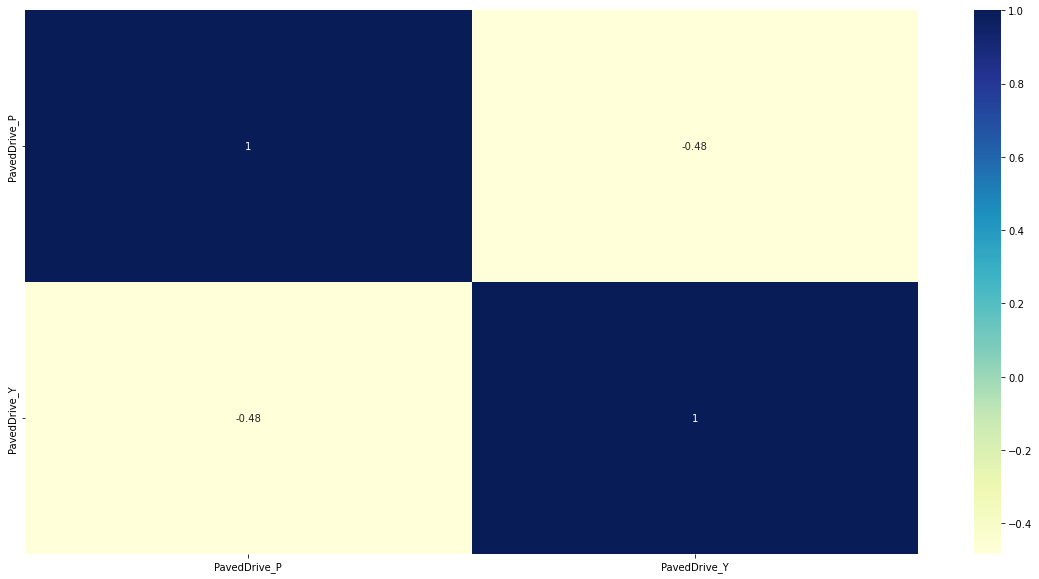

In [86]:
#PavedDrive

valuetosearch='PavedDrive'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

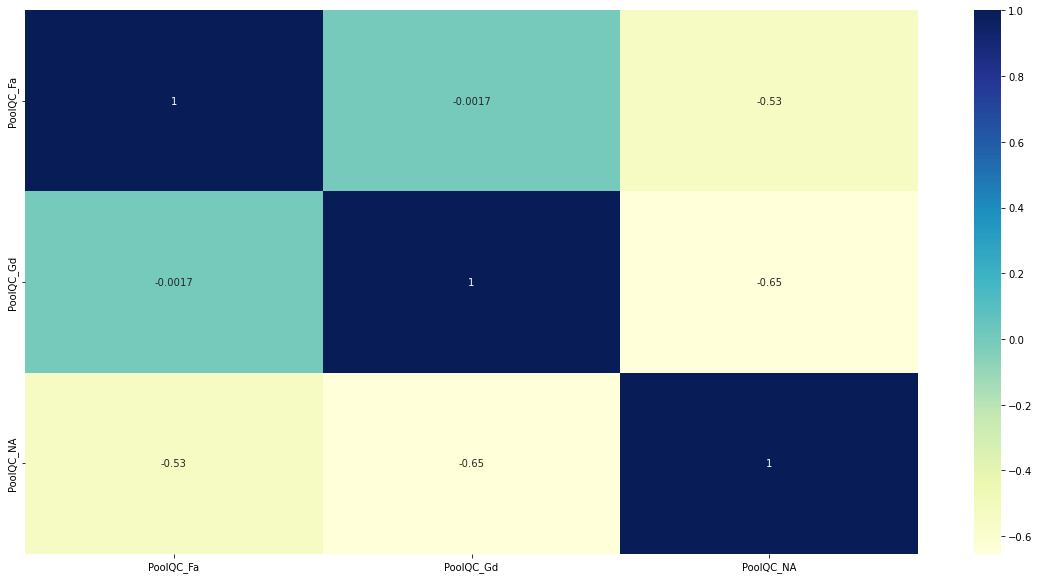

In [87]:
#PoolQC

valuetosearch='PoolQC'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is no significat correlation

<AxesSubplot:>

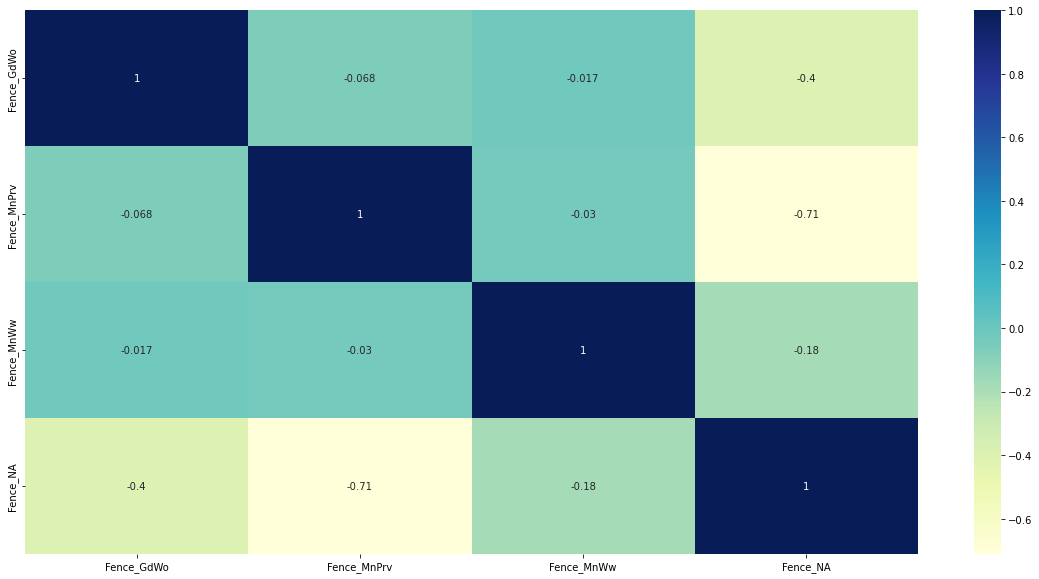

In [88]:
#Fence

valuetosearch='Fence'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "Fence_MnPrv" and "Fence_NA",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

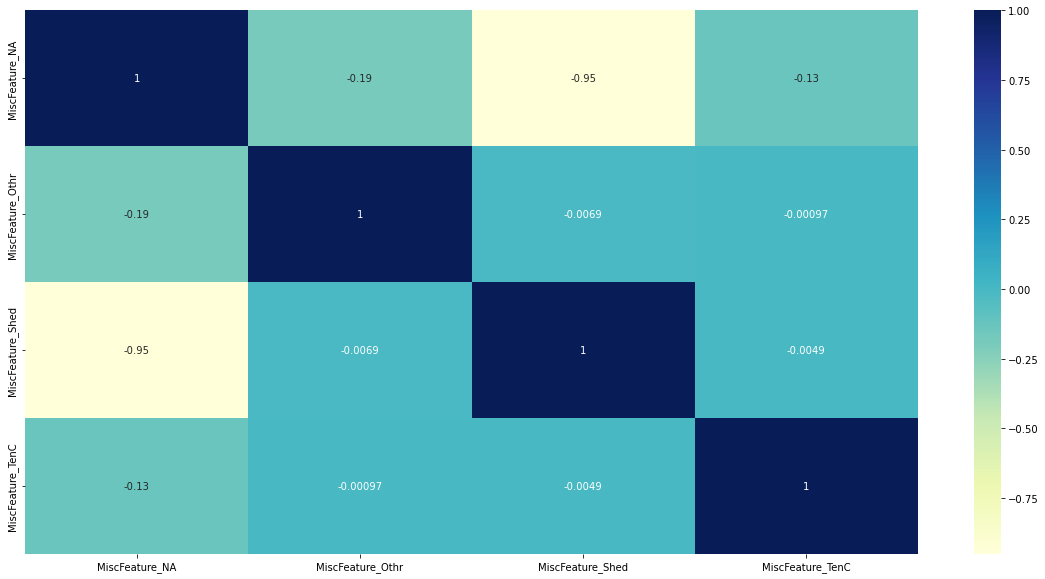

In [89]:
#MiscFeature

valuetosearch='MiscFeature'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "MiscFeature_NA" and "MiscFeature_Shed",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

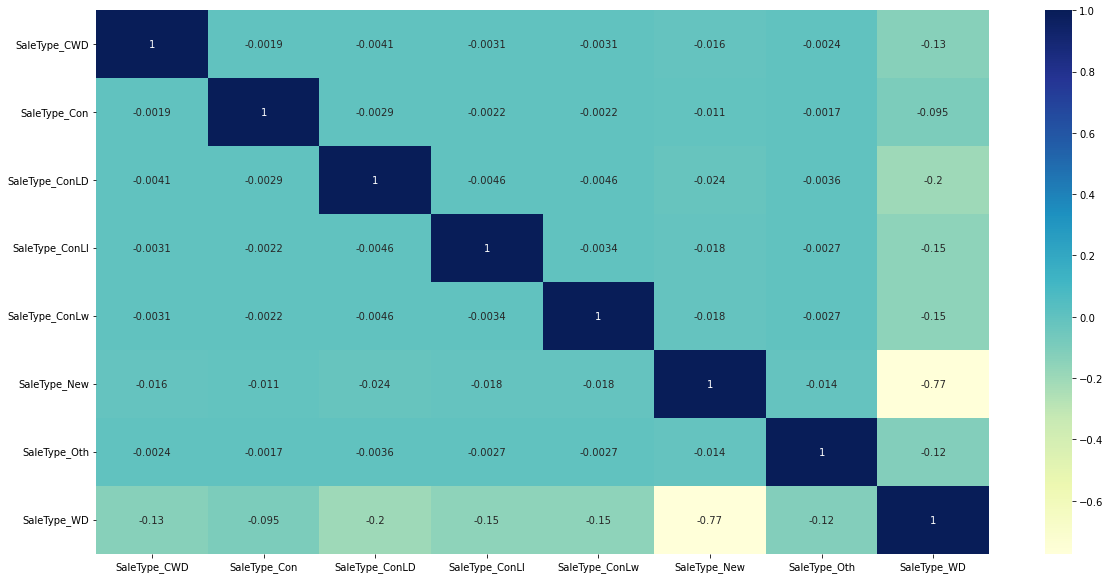

In [90]:
#SaleType

valuetosearch='SaleType'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "SaleType_New" and "SaleType_WD",thus having both variables on the model will not improve the model we can drop one of them

<AxesSubplot:>

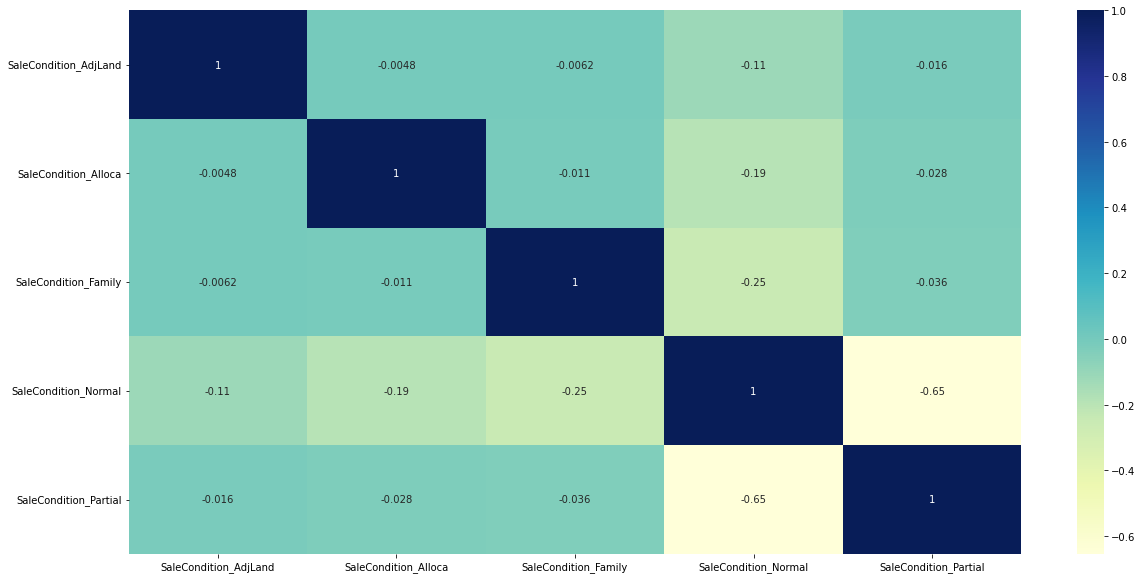

In [91]:
#SaleCondition

valuetosearch='SaleCondition'
my_list =  correlationmatrix.columns.values.tolist()
filtered_list = [elem for elem in my_list if valuetosearch in elem]
filtered_list_indexes = [my_list.index(elem) for elem in my_list if valuetosearch in elem]


firstElement = filtered_list_indexes[0]
lastElement = filtered_list_indexes[-1]+1

arr = correlationmatrix.to_numpy()

new_arr= []
for row in arr[firstElement:lastElement]:
    new_arr.append(list(row[firstElement:lastElement]))

pd_new=pd.DataFrame(new_arr,index=filtered_list)
pd_new.columns = filtered_list
plt.figure(figsize = (20,10))  
sns.heatmap(pd_new, annot=True, cmap="YlGnBu")

There is a significat correlation between "SaleCondition_Normal" and "SaleCondition_Partial",thus having both variables on the model will not improve the model we can drop one of them

Based on the above, before building the model, we should remove the dummy variables bellow to simply our model:

- MSZoning_RL
- Alley_NA
- Condition1_Norm
- Condition2_Norm
- HouseStyle_2Story
- RoofStyle_Hip
- RoofMatl_Tar&Grv
- MasVnrType_None
- ExterQual_Gd
- ExterCond_Gd
- Foundation_CBlock
- BsmtQual_Gd
- BsmtCond_Gd
- KitchenQual_Gd
- GarageType_Detchd
- GarageQual_NA
- GarageCond_NA
- Fence_MnPrv
- MiscFeature_NA
- SaleType_New
- SaleCondition_Normal 

In [92]:
# removing unnecessary dummy variables
df = df.drop(['MSZoning_RL','Alley_NA','Condition1_Norm','Condition2_Norm','HouseStyle_2Story', 'RoofStyle_Hip', 'RoofMatl_Tar&Grv', 'MasVnrType_None',
       'ExterQual_Gd', 'ExterCond_Gd', 'Foundation_CBlock','BsmtQual_Gd','BsmtCond_Gd','KitchenQual_Gd','GarageType_Detchd','GarageQual_NA','GarageCond_NA','Fence_MnPrv','MiscFeature_NA','SaleType_New','SaleCondition_Normal'], 1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,1,60,RL,65.0,8450,1,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
1,2,20,RL,80.0,9600,1,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
2,3,60,RL,68.0,11250,1,NA,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
3,4,70,RL,60.0,9550,1,NA,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.0,14260,1,NA,IR1,Lvl,AllPub,...,0,0,0,0,0,1,0,0,0,0


In [93]:
# Id collumn needs to be removed
df = df.drop(['Id'], 1)

In [94]:
#dropping collumns that originated the dummy variables
df = df.drop(['MSSubClass','MSZoning','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','FireplaceQu','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'], 1)

## Prepare for Model Building

#### Step 1 - Split into X and y

In [95]:
X = df.loc[ : , df.columns != 'SalePrice'] # independent variables
y = df['SalePrice'] # dependent variable

X

,LotFrontage,LotArea,Street,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,65.0,8450,1,2003,2003,196.0,706,0,150,856,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,1,1976,1976,0.0,978,0,284,1262,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,1,2001,2002,162.0,486,0,434,920,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,1,1915,1970,0.0,216,0,540,756,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,1,2000,2000,350.0,655,0,490,1145,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1,1999,2000,0.0,0,0,953,953,...,0,0,0,0,0,1,0,0,0,0
1456,85.0,13175,1,1978,1988,119.0,790,163,589,1542,...,0,0,0,0,0,1,0,0,0,0
1457,66.0,9042,1,1941,2006,0.0,275,0,877,1152,...,0,0,0,0,0,1,0,0,0,0
1458,68.0,9717,1,1950,1996,0.0,49,1029,0,1078,...,0,0,0,0,0,1,0,0,0,0


### Step 2 - scaling

In [96]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'Street', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=267)

### Step 2 - split into trainig and test sets

In [97]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Bulding and Evaluation

#### Step 1 - Linear Regression

In [98]:
# Instantiate
lm = LinearRegression()

In [99]:
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [100]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

618800738525.5664
[ 2.55718706e+03  6.70394451e+03  1.69030579e+03  1.38100175e+04
  3.03028952e+03  3.05022175e+03  1.24635213e+15  4.40827585e+14
  1.20746356e+15 -1.19882395e+15  5.69312500e+02  9.95414078e+14
  1.12400500e+15  1.25198228e+14 -1.35304491e+15  8.24062500e+02
 -1.39375000e+01  1.18696875e+03 -6.01437500e+02 -2.73816406e+03
 -4.17684375e+03 -5.69062500e+02  1.09100000e+03  2.74437500e+02
  1.30210938e+03  3.37082031e+03  6.06265625e+02  1.82365625e+03
  1.39811328e+03  1.03459375e+03  1.71393750e+03  2.54205781e+05
  4.01820312e+02 -1.05349219e+03 -5.37406250e+02 -1.58987500e+03
 -5.43171875e+02  6.15230023e+14  2.83332812e+03  1.83637500e+03
 -1.91894531e+02  5.39531250e+02  1.38328125e+03  8.46562500e+02
  5.83421875e+02  1.28260938e+03 -6.04562500e+02 -7.61531250e+02
 -2.54105862e+14 -6.70984375e+02  1.45718750e+02 -1.88875000e+02
  4.49562500e+02  4.38781250e+02  3.37328125e+02  8.15977539e+02
 -7.04351562e+02 -2.13453125e+03  5.44515625e+02 -5.18433594e+02
  2.176

In [101]:
from sklearn.metrics import r2_score, mean_squared_error

In [102]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9550440753561042
-4.1661205470879056e+19
286850214404.6872
1.1743096189026608e+32
280950258.96639293
2.6810721892754815e+29


### Linear Regression

In [103]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

618800738525.5664
[ 2.55718706e+03  6.70394451e+03  1.69030579e+03  1.38100175e+04
  3.03028952e+03  3.05022175e+03  1.24635213e+15  4.40827585e+14
  1.20746356e+15 -1.19882395e+15  5.69312500e+02  9.95414078e+14
  1.12400500e+15  1.25198228e+14 -1.35304491e+15  8.24062500e+02
 -1.39375000e+01  1.18696875e+03 -6.01437500e+02 -2.73816406e+03
 -4.17684375e+03 -5.69062500e+02  1.09100000e+03  2.74437500e+02
  1.30210938e+03  3.37082031e+03  6.06265625e+02  1.82365625e+03
  1.39811328e+03  1.03459375e+03  1.71393750e+03  2.54205781e+05
  4.01820312e+02 -1.05349219e+03 -5.37406250e+02 -1.58987500e+03
 -5.43171875e+02  6.15230023e+14  2.83332812e+03  1.83637500e+03
 -1.91894531e+02  5.39531250e+02  1.38328125e+03  8.46562500e+02
  5.83421875e+02  1.28260938e+03 -6.04562500e+02 -7.61531250e+02
 -2.54105862e+14 -6.70984375e+02  1.45718750e+02 -1.88875000e+02
  4.49562500e+02  4.38781250e+02  3.37328125e+02  8.15977539e+02
 -7.04351562e+02 -2.13453125e+03  5.44515625e+02 -5.18433594e+02
  2.176

In [104]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9550440753561042
-4.1661205470879056e+19
286850214404.6872
1.1743096189026608e+32
280950258.96639293
2.6810721892754815e+29


## Ridge Regression

In [105]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [107]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.54035222e+03  4.15268436e+03  9.57689414e+02  4.49005634e+03
  2.93935699e+03  3.11000902e+03  5.27679738e+03  1.35221026e+03
  3.39183492e+02  6.32485773e+03  8.17486547e+02  7.66579639e+03
  8.84946936e+03 -1.55017412e+03  1.28476226e+04  1.94508738e+03
 -1.81629515e+01  3.53614558e+03  1.66014781e+03 -1.16483468e+03
 -3.08297652e+03  2.86311863e+03  2.51319406e+03  8.55241493e+02
  3.45948524e+03  2.77017169e+03  7.72604804e+02  1.59635631e+03
  1.45305119e+01  1.28484693e+03  1.51042013e+03  2.39053796e+03
  3.32471270e+02 -6.49243791e+02 -4.24611372e+02 -1.23762995e+03
 -5.54974505e+02 -1.14451431e+03  2.01983848e+03  1.21572349e+01
  1.13627696e+02  3.31898595e+02  6.37382998e+02  7.99582283e+02
  2.86857204e+02 -9.49774211e+02 -4.88468496e+02 -3.69511602e+02
 -9.06725307e+02 -1.14473906e+02  1.98144795e+02 -6.24234131e+01
  7.78431790e+02  4.01906982e+02 -5.60795380e+02  2.90208154e+02
  7.25381794e+02 -3.28929496e+02  1.80092584e+03 -8.21914129e+02
  2.13736505e+03 -1.32850

In [108]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9413119507695464
0.6843076952867787
374470765268.40607
889845855030.3281
366768624.1610246
2031611541.1651328


## Lasso

In [109]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [110]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [111]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9429606425349499
0.4754248103012848
363950959700.18854
1478626660314.6646
356465190.6955813
3375859955.0563116


In [113]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.550441e-01,9.413120e-01,9.429606e-01
1,R2 Score (Test),-4.166121e+19,6.843077e-01,4.754248e-01
2,RSS (Train),2.868502e+11,3.744708e+11,3.639510e+11
3,RSS (Test),1.174310e+32,8.898459e+11,1.478627e+12
4,MSE (Train),1.676157e+04,1.915120e+04,1.888029e+04
5,MSE (Test),5.177907e+14,4.507340e+04,5.810215e+04
